In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.lumped.cap_n_interdigital import CapNInterdigital
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

In [4]:
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)

In [5]:
design.overwrite_enabled = True
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

In [6]:
design.chips.main.size.size_x = '12mm'
design.chips.main.size.size_y = '12mm'

## Define Qubits

#### 4 Qubits -- 2 TransmonPocket Qubits with Drive Lines, 2 TransmonCross Qubits (X-mon) with Flux Lines

In [7]:
TransmonPocketCL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'make_CL': True,
 'cl_gap': '6um',
 'cl_width': '10um',
 'cl_length': '20um',
 'cl_ground_gap': '6um',
 'cl_pocket_edge': '0',
 'cl_off_center': '50um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 

In [8]:
Q_1 = TransmonPocketCL(design,'Q_1', options = dict(
    pos_x='-3mm',
    pos_y='-1mm',
    gds_cell_name = 'FakeJunction_01',
    hfss_inductance = '14nH',
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=-1, loc_H=1, pad_width = '80um', pad_gap = '50um'),
        bus_13 = dict(loc_W=1, loc_H=1, pad_width = '60um', pad_gap = '10um'),
        bus_14 = dict(loc_W=1, loc_H=-1, pad_width = '60um', pad_gap = '10um')
    )
))

Q_2 = TransmonPocketCL(design,'Q_2', options = dict(
    pos_x='3mm',
    pos_y='1mm',
    orientation='180',
    gds_cell_name = 'FakeJunction_01',
    hfss_inductance = '14nH',
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=-1, loc_H=1, pad_width = '80um', pad_gap = '50um'),
        bus_23 = dict(loc_W=1, loc_H=-1, pad_width = '60um', pad_gap = '10um'),
        bus_24 = dict(loc_W=1, loc_H=1, pad_width = '60um', pad_gap = '10um')
    )
))

gui.rebuild()
gui.autoscale()

In [9]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'claw_cpw_length': '40um',
  'claw_cpw_width': '10um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction',
 'aedt_q3d_inductance': 1e-08,
 'aedt_q3d_capacitance': 0,
 'aedt_hfss_inductanc

In [9]:
Q_3 = TransmonCrossFL(design, 'Q_3', options=dict(
    pos_x='0mm',
    pos_y='3mm',
    orientation='180',
    connection_pads=dict(
        bus_13=dict(connector_location='180', claw_length='95um'),
        bus_23=dict(connector_location='90', claw_length='95um'),
        readout=dict(connector_location='-90')
    ),
    fl_options=dict()
))

Q_4 = TransmonCrossFL(design, 'Q_4', options=dict(
    pos_x='0mm',
    pos_y='-3mm',
    orientation='0',
    connection_pads=dict(
        bus_14=dict(connector_location='90', claw_length='95um'),
        bus_24=dict(connector_location='180', claw_length='95um'),
        readout=dict(connector_location='0')
    ),
    fl_options=dict()
))

gui.rebuild()
gui.autoscale()

## Resonator Bus Length Determine

In [11]:
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength

In [12]:
?guided_wavelength

Signature:
guided_wavelength(
    freq,
    line_width,
    line_gap,
    substrate_thickness,
    film_thickness,
    dielectric_constant=11.45,
)
Docstring:
A simple calculator to determine the guided wavelength of a planar CPW
transmission line. Assumes the substrate has relative permeability of 1.
Assumes package grounds are far away.

Args:
    freq (float): The frequency of interest, in Hz (eg. 5*10**9).
    line_width (float): The width of the CPW trace (center) line, in meters (eg. 10*10**-6).
    line_gap (float): The width of the CPW gap (dielectric space), in meters (eg. 6*10**-6).
    substrate_thickness (float): Thickness of the dielectric substrate, in meters (eg. 760*10**-6).
    film_thickness (float): Thickness of the thin film, in meters (eg. 200*10**-9).
    dielectric_constant (float): The relative permittivity of the substrate.
        Defaults to 11.45, the value for Silicon at cryogenic temperatures.

Returns:
    tuple: Contents outlined below

Tuple contents:
 

### Relative Permittivity/ Dielectric Constant of Substrate is 11.45 (Silicon at Cryogenic Temperature)
### If we choose different substrate we have to change the value here

In [13]:
def find_resonator_length(frequency, line_width, line_gap, N):
    # frequency in GHz
    # line_width/line_gap in um
    # N -> 2 for lambda/2, 4 for lambda/4
    # substrate dimensions and properties already set (Default dielectric constant value is used)
    
    
    [lambdaG, effSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    
    return str(lambdaG/N*10**3) + " mm"

### Substrate Thickness is 750 micrometer and film thickness 200 nm
### Linewidth = 10, LineGap = 2

In [14]:
find_resonator_length(5.8,10,2,2) #bus13

'10.652379409921904 mm'

In [15]:
find_resonator_length(6,10,2,2) #bus23

'10.297300096231258 mm'

In [16]:
find_resonator_length(6.2,10,2,2) #bus24

'9.965129125358668 mm'

In [17]:
find_resonator_length(6.4,10,2,2) #bus14

'9.653718840164947 mm'

In [18]:
bus_13 = RouteMeander(design, 'Bus_13', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs = Dict(
                                                start_pin = Dict(
                                                    component = 'Q_1',
                                                    pin = 'bus_13'
                                                ),
                                                end_pin = Dict(
                                                    component = 'Q_3',
                                                    pin = 'bus_13'
                                                )
                                            ),
                                            lead = Dict(
                                                start_straight = '125um',
                                                end_straight = '225um'
                                            ),
                                            meander = Dict(
                                                asymmetry = '50um'),
                                                fillet = "99um",
                                                total_length = '10.65mm'
                                            
                                        ))

bus_23 = RouteMeander(design, 'Bus_23', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_2',
                                                pin = 'bus_23'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_3',
                                                pin = 'bus_23'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '10.3mm'
                                        
                                    ))

bus_24 = RouteMeander(design, 'Bus_24', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_2',
                                                pin = 'bus_24'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_4',
                                                pin = 'bus_24'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '9.97mm'
                                        
                                    ))

bus_14 = RouteMeander(design, 'Bus_14', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_1',
                                                pin = 'bus_14'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_4',
                                                pin = 'bus_14'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '9.65mm'
                                        
                                    ))

gui.rebuild()
gui.autoscale()

In [19]:
from collections import OrderedDict
jogs_start = OrderedDict()
jogs_start[0] = ['L', '350um']
jogs_start[1] = ['L', '500um']

jogs_end = OrderedDict()
jogs_end[0] = ['L', '680um']
jogs_end[1] = ['L','700um']

bus_13 = RouteMeander(design, 'Bus_13', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs = Dict(
                                                start_pin = Dict(
                                                    component = 'Q_1',
                                                    pin = 'bus_13'
                                                ),
                                                end_pin = Dict(
                                                    component = 'Q_3',
                                                    pin = 'bus_13'
                                                )
                                            ),
                                            lead = Dict(
                                                start_straight = '125um',
                                                end_straight = '225um'
                                            ),
                                            meander = Dict(
                                                asymmetry = '50um'),
                                                fillet = "99um",
                                                total_length = '10.65mm'
                                            
                                        ))

jogs_start = OrderedDict()
jogs_start[0] = ['R', '350um']
jogs_start[1] = ['R', '700um']

bus_23 = RouteMeander(design, 'Bus_23', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_2',
                                                pin = 'bus_23'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_3',
                                                pin = 'bus_23'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '10.3mm'
                                        
                                    ))

jogs_start = OrderedDict()
jogs_start[0] = ['R', '350um']
jogs_start[1] = ['R', '700um']

bus_24 = RouteMeander(design, 'Bus_24', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_2',
                                                pin = 'bus_24'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_4',
                                                pin = 'bus_24'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '9.97mm'
                                        
                                    ))

jogs_start = OrderedDict()
jogs_start[0] = ['R', '350um']
jogs_start[1] = ['R', '700um']
bus_14 = RouteMeander(design, 'Bus_14', options = dict(
                                        hfss_wire_bonds = True,
                                        pin_inputs = Dict(
                                            start_pin = Dict(
                                                component = 'Q_1',
                                                pin = 'bus_14'
                                            ),
                                            end_pin = Dict(
                                                component = 'Q_4',
                                                pin = 'bus_14'
                                            )
                                        ),
                                        lead = Dict(
                                            start_straight = '125um',
                                            end_straight = '225um'
                                        ),
                                        meander = Dict(
                                            asymmetry = '50um'),
                                            fillet = "99um",
                                            total_length = '9.65mm'
                                        
                                    ))

gui.rebuild()
gui.autoscale()


## Readout and Control Line
### Readout resonator frequencies: readout_Q1= 6.8 GHz, readout_Q2= 7 GHz, readout_Q3= 7.2 GHz, readout_Q4= 7.4 GHz
### LineWidth = 10, LineGap = 6

In [20]:
launch_readout_q_1 = LaunchpadWirebond(design, 'Launch_Readout_Q_1',
                                        options = dict(
                                            pos_x = '-4mm',
                                            pos_y = '4mm',
                                            orientation = '-90'
                                        ))

launch_readout_q_2 = LaunchpadWirebond(design, 'Launch_Readout_Q_2',
                                        options = dict(
                                            pos_x = '4mm',
                                            pos_y = '-4mm',
                                            orientation = '90'
                                        ))

launch_readout_q_3 = LaunchpadWirebond(design, 'Launch_Readout_Q_3',
                                        options = dict(
                                            pos_x = '4mm',
                                            pos_y = '4mm',
                                            orientation = '-90'
                                        ))
launch_readout_q_4 = LaunchpadWirebond(design, 'Launch_Readout_Q_4',
                                        options = dict(
                                            pos_x = '-4mm',
                                            pos_y = '-4mm',
                                            orientation = '90'
                                        ))




gui.rebuild()
gui.autoscale()


In [21]:
launch_cl_q_1 = LaunchpadWirebond(design, 'Launch_CL_Q_1',
                                    options = dict(
                                        pos_x = '-4mm',
                                        pos_y = '-1mm',
                                        orientation = '0',
                                        trace_width = '5um',
                                        trace_gap = '3um'
                                    ))

launch_cl_q_2 = LaunchpadWirebond(design, 'Launch_CL_Q_2',
                                    options = dict(
                                        pos_x = '4mm',
                                        pos_y = '1mm',
                                        orientation = '180',
                                        trace_width = '5um',
                                        trace_gap = '3um'
                                    ))


launch_fl_q_3 = LaunchpadWirebond(design, 'Launch_FL_Q_3',
                                    options = dict(
                                        pos_x = '0mm',
                                        pos_y = '4mm',
                                        orientation = '-90',
                                        trace_width = '5um',
                                        trace_gap = '3um'
                                    ))

launch_fl_q_4 = LaunchpadWirebond(design, 'Launch_FL_Q_4',
                                    options = dict(
                                        pos_x = '0mm',
                                        pos_y = '-4mm',
                                        orientation = '90',
                                        trace_width = '5um',
                                        trace_gap = '3um'
                                    ))



gui.rebuild()
gui.autoscale()

In [22]:
?CapNInterdigital

Init signature:
CapNInterdigital(
    design: 'QDesign',
    name: str = None,
    options: addict.addict.Dict = None,
    make=True,
    component_template: addict.addict.Dict = None,
) -> typing.Optional[str]
Docstring:     
Generates a two pin (+) structure comprised of a north CPW transmission
line, and a south transmission line, coupled together via a finger
capacitor. Such a structure can be used, as an example, for generating CPW
resonators. (0,0) represents the center position of the component. Setting
finger length to 0 gives a simple gap capacitor. The width of the gap
capacitor is found via.

(cap_width * finger_count +  * cap_gap * (finger_count-1)).

Inherits QComponent class.

::

              (0,0)     N
                +       ^
                |       |
                |
                |
           --|-----|--
          |  |  |  |  |
          |-----|-----|
                |
                |
                |
                |
                +

.. image::
    CapNI

In [23]:
cap_readout_q_1 = CapNInterdigital(design, 'Cap_Readout_Q_1',
                                options=dict(
                                    pos_x='-4mm',
                                    pos_y='3.8mm',
                                    orientation='0'
                                ))

cap_readout_q_2 = CapNInterdigital(design, 'Cap_Readout_Q_2',
                                options=dict(
                                    pos_x='4mm',
                                    pos_y='-3.8mm',
                                    orientation='180'
                                ))

cap_readout_q_3 = CapNInterdigital(design, 'Cap_Readout_Q_3',
                                options=dict(
                                    pos_x='4mm',
                                    pos_y='3.8mm',
                                    orientation='0'
                                ))

cap_readout_q_4 = CapNInterdigital(design, 'Cap_Readout_Q_4',
                                options=dict(
                                    pos_x='-4mm',
                                    pos_y='-3.8mm',
                                    orientation='180'
                                ))

gui.rebuild()
gui.autoscale()

### In order to tune capacitive coupling strength, we can change number of fingers(finger_count) or size of transmission line

In [24]:
find_resonator_length(6.8,10,6,2) #Readout_Q1

'8.95050496196293 mm'

In [25]:
find_resonator_length(7,10,6,2) #Readout_Q2

'8.694776247529553 mm'

In [26]:
find_resonator_length(7.2,10,6,2) #Readout_Q3

'8.453254683870284 mm'

In [27]:
find_resonator_length(7.4,10,6,2) #Readout_Q4

'8.224788339841421 mm'

In [28]:
jogs_start = OrderedDict()
jogs_start[0] = ['R', '350um']
jogs_end[0] = ['R', '300um']

readout_1 = RouteMeander(design, 'Readout_1', options=dict(
                                    hfss_wire_bonds=True,
                                    pin_inputs=Dict(
                                        start_pin=Dict(
                                            component='Q_1',
                                            pin='readout'
                                        ),
                                        end_pin=Dict(
                                            component='Cap_Readout_Q_1',
                                            pin='south_end'
                                        )
                                    ),
                                    lead=Dict(
                                        start_straight='125um',
                                        end_straight='125um',
                                        start_jogged_extension=jogs_start,
                                        end_jogged_extension=jogs_end
                                    ),
                                    meander=Dict(
                                        asymmetry='150um'),
                                        fillet='99um',
                                        total_length='8.95mm'
                                    
                                ))





readout_2 = RouteMeander(design, 'Readout_2', options=dict(
                                    hfss_wire_bonds=True,
                                    pin_inputs=Dict(
                                        start_pin=Dict(
                                            component='Q_2',
                                            pin='readout'
                                        ),
                                        end_pin=Dict(
                                            component='Cap_Readout_Q_2',
                                            pin='south_end'
                                        )
                                    ),
                                    lead=Dict(
                                        start_straight='125um',
                                        end_straight='125um',
                                        start_jogged_extension=jogs_start,
                                        # end_jogged_extension=jogs_end
                                    ),
                                    meander=Dict(
                                        asymmetry='150um'),
                                        fillet='99um',
                                        total_length='8.69mm'
                                    
                                ))



readout_3 = RouteMeander(design, 'Readout_3', options=dict(
                                    hfss_wire_bonds=True,
                                    pin_inputs=Dict(
                                        start_pin=Dict(
                                            component='Q_3',
                                            pin='readout'
                                        ),
                                        end_pin=Dict(
                                            component='Cap_Readout_Q_3',
                                            pin='south_end'
                                        )
                                    ),
                                    lead=Dict(
                                        start_straight='125um',
                                        end_straight='125um',
                                        start_jogged_extension=jogs_start,
                                        # end_jogged_extension=jogs_end
                                    ),
                                    meander=Dict(
                                        asymmetry='150um'),
                                        fillet='99um',
                                        total_length='8.45mm'
                                    
                                ))



readout_4 = RouteMeander(design, 'Readout_4', options=dict(
                                    hfss_wire_bonds=True,
                                    pin_inputs=Dict(
                                        start_pin=Dict(
                                            component='Q_4',
                                            pin='readout'
                                        ),
                                        end_pin=Dict(
                                            component='Cap_Readout_Q_4',
                                            pin='south_end'
                                        )
                                    ),
                                    lead=Dict(
                                        start_straight='125um',
                                        end_straight='125um',
                                        start_jogged_extension=jogs_start,
                                        # end_jogged_extension=jogs_end
                                    ),
                                    meander=Dict(
                                        asymmetry='150um'),
                                        fillet='99um',
                                        total_length='8.22mm'
                                    
                                ))

gui.rebuild()
gui.autoscale()


## Flux Line and Charge Line

In [29]:
Q_1.pin_names

{'Charge_Line', 'bus_13', 'bus_14', 'readout'}

In [30]:
Q_3.pin_names

{'bus_13', 'bus_23', 'flux_line', 'readout'}

In [31]:
jogs_start = OrderedDict()
jogs_start[0] = ['R', '350um']
jogs_end[0] = ['R', '100um']


charge_line_q_1 = RoutePathfinder(design, 'Charge_Line_Q_1', options = dict(
                                            hfss_wire_bonds = True,
                                            fillet='99um',
                                            trace_width = '5um',
                                            trace_gap = '3um',
    
                                            lead=dict(
                                                start_straight='125um',
                                                end_straight='125um',
                                                start_jogged_extension=jogs_start,
                                                #end_jogged_extension=jogs_end
                                                #end_straight='150um'
                                                ),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Launch_CL_Q_1',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q_1',
                                                    pin='Charge_Line')
                                            )))





charge_line_q_2 = RoutePathfinder(design, 'Charge_Line_Q_2', options = dict(
                                            hfss_wire_bonds = True,
                                            fillet='99um',
                                            trace_width = '5um',
                                            trace_gap = '3um',
    
                                            lead=dict(
                                                start_straight='125um',
                                                end_straight='125um',
                                                start_jogged_extension=jogs_start,
                                            ),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Launch_CL_Q_2',
                                                    pin='tie'),
                                                end_pin=Dict(
                                                    component='Q_2',
                                                    pin='Charge_Line')
                                            )))

flux_line_q_3 = RoutePathfinder(design, 'Flux_Line_Q_3', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_3',
                                                    pin='flux_line'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_FL_Q_3',
                                                    pin='tie'
                                                )
                                            ),
                                            fillet = '99um',
                                            trace_width = '5um',
                                            trace_gap = '3um'
                                        ))
flux_line_q_4 = RoutePathfinder(design, 'Flux_Line_Q_4', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_4',
                                                    pin='flux_line'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_FL_Q_4',
                                                    pin='tie'
                                                )
                                            ),
                                            fillet = '99um',
                                            trace_width = '5um',
                                            trace_gap = '3um'
                                        ))

gui.rebuild()
gui.autoscale()

In [32]:
tl_readout_q_1 = RouteStraight(design, 'TL_Readout_Q_1', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Cap_Readout_Q_1',
                                                    pin='north_end'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_Readout_Q_1',
                                                    pin='tie'
                                                )
                                            ),
                                            trace_width = '10um',
                                            trace_gap = '6um'
                                        ))
tl_readout_q_2 = RouteStraight(design, 'TL_Readout_Q_2', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Cap_Readout_Q_2',
                                                    pin='north_end'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_Readout_Q_2',
                                                    pin='tie'
                                                )
                                            ),
                                            trace_width = '10um',
                                            trace_gap = '6um'
                                        ))

tl_readout_q_3 = RouteStraight(design, 'TL_Readout_Q_3', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Cap_Readout_Q_3',
                                                    pin='north_end'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_Readout_Q_3',
                                                    pin='tie'
                                                )
                                            ),
                                            trace_width = '10um',
                                            trace_gap = '6um'
                                        ))

tl_readout_q_4 = RouteStraight(design, 'TL_Readout_Q_4', options = dict(
                                            hfss_wire_bonds = True,
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Cap_Readout_Q_4',
                                                    pin='north_end'
                                                ),
                                                end_pin=Dict(
                                                    component='Launch_Readout_Q_4',
                                                    pin='tie'
                                                )
                                            ),
                                            trace_width = '10um',
                                            trace_gap = '6um'
                                        ))

gui.rebuild()
gui.autoscale()

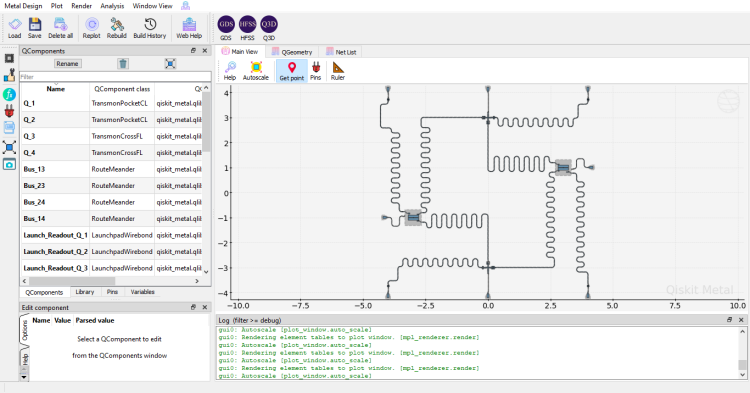

In [33]:
gui.screenshot()

## Target Parameters:
<br> qubit frequency - Q1 = 4.8, Q2 = 5, Q3 = 5.2, Q4 = 5.4 GHz
<br> qubit anharmonicity >= 300 MHz
<br> qubit - bus coupling (g) ~ 80 MHz
<br> qubit - readout coupling (chi) ~ 1 MHz
<br> bus frequency - bus_13 = 5.8, bus_23 = 6, bus_24 = 6.2, bus_14 = 6.4 GHz
<br> readout_frequencies - 6.8, 7, 7.2, 7.4 GHz
<br> readout coupling to external lines, Q_external ~ 2000


## Simulation LOM

All the qubit parameters will be tuned initially via a capacitance matrix and lumped oscillator model. This is comparatively less accurate but faster method

Qubit frequency depends on Josephson Junction that we will fabricate later on.
<br> Anharmonicity of qubit depends on actual layout of the qubit, conductive material.
<br> Coupling strength (chi, g) depends on capacitive coupling between the conductioon paths and charge islands in this case.

### Tuning the Qubits

In [34]:
from qiskit_metal.analyses.quantization import LOManalysis

In [35]:
c1 = LOManalysis(design, "q3d")

In [36]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

c1.sim.setup.name = 'Tune_Q_1'
c1.sim.setup.freq_ghz = 4.8
c1.sim.setup.max_passes = 16
c1.sim.setup.min_converged_passes = 2
c1.sim.setup.percent_error = 0.05
c1.sim.setup

In [37]:
?c1.sim.run

Signature: c1.sim.run(*args, **kwargs)
Docstring:
Alias for run_sim() necessary to implement super-class method, while
preventing method name collision when sim and non-sim QAnalysis classes are inherited.
File:      c:\programdata\anaconda3\envs\qmetal\lib\site-packages\qiskit_metal\analyses\core\simulation.py
Type:      method

In [39]:
Q_1.pins.keys()

dict_keys(['readout', 'bus_13', 'bus_14', 'Charge_Line'])

In [40]:
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])

INFO 02:30PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:30PM [load_ansys_project]: 	Opened Ansys App
INFO 02:30PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 02:30PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 02:30PM [connect_design]: No active design found (or error getting active design).
INFO 02:30PM [connect]: 	 Connected to project "Project5". No design detected
INFO 02:30PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]
WARNING 02:30PM [connect_setup]: 	No design setup detected.
WARNING 02:30PM [connect_setup]: 	Creating Q3D default setup.
INFO 02:30PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:30PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:30PM [analyze]: Analyzing setup Tune_Q_1
INFO 02:34PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Te

In [41]:
c1.sim.capacitance_matrix

,bus_13_connector_pad_Q_1,bus_14_connector_pad_Q_1,cl_metal_Q_1,ground_main_plane,pad_bot_Q_1,pad_top_Q_1,readout_connector_pad_Q_1
bus_13_connector_pad_Q_1,42.53696,-0.21103,-0.00638,-31.08009,-1.14864,-9.29584,-0.16382
bus_14_connector_pad_Q_1,-0.21103,42.53686,-0.00582,-31.14094,-9.34278,-1.13033,-0.07507
cl_metal_Q_1,-0.00638,-0.00582,16.52872,-15.97661,-0.14199,-0.20620,-0.11511
ground_main_plane,-31.08009,-31.14094,-15.97661,249.29469,-40.82433,-37.74708,-34.13436
pad_bot_Q_1,-1.14864,-9.34278,-0.14199,-40.82433,88.30486,-32.76215,-1.19847
pad_top_Q_1,-9.29584,-1.13033,-0.20620,-37.74708,-32.76215,90.10237,-6.18107
readout_connector_pad_Q_1,-0.16382,-0.07507,-0.11511,-34.13436,-1.19847,-6.18107,42.63760


In [42]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.setup.freq_readout = 6.8
c1.setup.freq_bus = [5.8, 6, 8]  

In [43]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.917796 [GHz]
EC 314.666930 [MHz]
EJ 10.966148 [GHz]
alpha -375.093355 [MHz]
dispersion 206.298818 [KHz]
Lq 14.893992 [nH]
Cq 61.557877 [fF]
T1 363.020158 [us]

**Coupling Properties**

tCqbus1 -2.425765 [fF]
gbus1_in_MHz -35.141466 [MHz]
χ_bus1 -0.225019 [MHz]
1/T1bus1 167.003043 [Hz]
T1bus1 953.006247 [us]

tCqbus2 -3.980846 [fF]
gbus2_in_MHz -49.169869 [MHz]
χ_bus2 -1.651522 [MHz]
1/T1bus2 151.732290 [Hz]
T1bus2 1048.919403 [us]

tCqbus3 4.199233 [fF]
gbus3_in_MHz 53.651679 [MHz]
χ_bus3 -1.387998 [MHz]
1/T1bus3 119.682491 [Hz]
T1bus3 1329.809750 [us]

tCqbus4 -0.029013 [fF]
gbus4_in_MHz -0.495589 [MHz]
χ_bus4 -0.000018 [MHz]
1/T1bus4 0.001199 [Hz]
T1bus4 132734844.852724 [us]
Bus-Bus Couplings
gbus1_2 2.170039 [MHz]
gbus1_3 2.023545 [MHz]
gbus1_4 0.476598 [MHz]
gbus2_3 2.665936 [MHz]
gbus2_4 0.117611 [MHz]
gbus3_4 0.120219 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.289056,368.487199,10.966148,-448.465789,690.604044,"[-31.774496156217896, -45.03844604649601, 40.3...","[-0.3123093965996632, -3.7269145010157825, -1....",0.312309,31.774496
2,5.213884,357.180871,10.966148,-432.805828,548.46596,"[-34.39714654832053, -45.39244390546804, 48.34...","[-0.32718667185908906, -3.001824857808574, -2....",0.327187,34.397147
3,5.133449,345.315164,10.966148,-416.514456,425.346047,"[-34.00000382385623, -46.45701401585289, 50.49...","[-0.28440038141426977, -2.506067541076813, -1....",0.284400,34.000004
4,5.068359,335.887058,10.966148,-403.672527,344.170679,"[-34.11279711985558, -47.06784046064517, 50.87...","[-0.2609869707197266, -2.1689744976184873, -1....",0.260987,34.112797
5,5.032646,330.779715,10.966148,-396.753248,305.689167,"[-34.05776422472714, -47.53961977600745, 51.73...","[-0.24744899317393237, -2.0234464509848946, -1...",0.247449,34.057764
6,4.995239,325.479577,10.966148,-389.600243,269.485894,"[-34.21313559513416, -47.32047625930678, 51.37...","[-0.2370866865170054, -1.8308177702597421, -1....",0.237087,34.213136
7,4.978331,323.100494,10.966148,-386.398492,254.399358,"[-34.54205453001084, -47.74407192422917, 52.16...","[-0.23610643748860669, -1.790391758259709, -1....",0.236106,34.542055
8,4.959067,320.402413,10.966148,-382.774169,238.120599,"[-34.58728110419293, -47.90776606607217, 52.28...","[-0.23055818818163454, -1.72317839294403, -1.4...",0.230558,34.587281
9,4.947665,318.811841,10.966148,-380.6409,228.924417,"[-34.73135715920614, -48.18152314049909, 52.57...","[-0.2288935172049823, -1.6975356598906342, -1....",0.228894,34.731357
10,4.939958,317.739209,10.966148,-379.203686,222.886147,"[-34.868918100068214, -48.44754855003252, 52.8...","[-0.22830202464617133, -1.686198805397649, -1....",0.228302,34.868918


In [44]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 02:34PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [45]:
Q_1.options

{'pos_x': '-3mm',
 'pos_y': '-1mm',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {'readout': {'pad_gap': '50um',
   'pad_width': '80um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': -1,
   'loc_H': 1},
  'bus_13': {'pad_gap': '10um',
   'pad_width': '60um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H': 1},
  'bus_14': {'pad_gap': '10um',
   'pad_width': '60um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
 

In [46]:
Q_1.options.pad_gap = '28um'
Q_1.options.connection_pads.readout.pad_gap = '20um'
Q_1.options.connection_pads.readout.pad_width = '100um'
Q_1.options.connection_pads.bus_13.pad_width = '130um'
Q_1.options.connection_pads.bus_14.pad_width = '130um'

gui.rebuild()

In [47]:
c1.sim.renderer.clean_active_design()

In [48]:
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])

INFO 02:53PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]
INFO 02:53PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:53PM [analyze]: Analyzing setup Tune_Q_1
INFO 02:57PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpcnxm4qhd.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 02:57PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpcl_n1__8.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 02:57PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpm1mm_6hh.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 02:57PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpoal4ep2w.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [49]:
c1.sim.capacitance_matrix

,bus_13_connector_pad_Q_1,bus_14_connector_pad_Q_1,cl_metal_Q_1,ground_main_plane,pad_bot_Q_1,pad_top_Q_1,readout_connector_pad_Q_1
bus_13_connector_pad_Q_1,53.32915,-0.35422,-0.00980,-34.17921,-1.62762,-15.99468,-0.31770
bus_14_connector_pad_Q_1,-0.35422,53.31769,-0.00879,-34.28616,-16.11262,-1.58902,-0.12183
cl_metal_Q_1,-0.00980,-0.00879,16.53455,-15.95972,-0.13813,-0.18843,-0.15351
ground_main_plane,-34.17921,-34.28616,-15.95972,249.33566,-38.58662,-34.48661,-33.50304
pad_bot_Q_1,-1.62762,-16.11262,-0.13813,-38.58662,93.55516,-32.90602,-1.44607
pad_top_Q_1,-15.99468,-1.58902,-0.18843,-34.48661,-32.90602,98.21055,-10.48478
readout_connector_pad_Q_1,-0.31770,-0.12183,-0.15351,-33.50304,-1.44607,-10.48478,46.81114


In [50]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.setup.freq_readout = 6.8
c1.setup.freq_bus = [5.8, 6, 8]  

In [51]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.794596 [GHz]
EC 297.905991 [MHz]
EJ 10.966148 [GHz]
alpha -352.829389 [MHz]
dispersion 132.435416 [KHz]
Lq 14.893992 [nH]
Cq 65.021278 [fF]
T1 159.891150 [us]

**Coupling Properties**

tCqbus1 -4.280428 [fF]
gbus1_in_MHz -59.327050 [MHz]
χ_bus1 -0.544239 [MHz]
1/T1bus1 407.064601 [Hz]
T1bus1 390.982028 [us]

tCqbus2 -6.830626 [fF]
gbus2_in_MHz -80.694541 [MHz]
χ_bus2 -3.407214 [MHz]
1/T1bus2 306.076579 [Hz]
T1bus2 519.984062 [us]

tCqbus3 7.616293 [fF]
gbus3_in_MHz 93.068243 [MHz]
χ_bus3 -3.308339 [MHz]
1/T1bus3 282.253990 [Hz]
T1bus3 563.871367 [us]

tCqbus4 -0.018610 [fF]
gbus4_in_MHz -0.304562 [MHz]
χ_bus4 -0.000006 [MHz]
1/T1bus4 0.000406 [Hz]
T1bus4 392313149.650612 [us]
Bus-Bus Couplings
gbus1_2 5.003096 [MHz]
gbus1_3 4.701154 [MHz]
gbus1_4 0.633190 [MHz]
gbus2_3 6.278444 [MHz]
gbus2_4 0.166662 [MHz]
gbus3_4 0.169947 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.184379,352.800584,10.966148,-426.774848,500.100457,"[-51.05015079535539, -74.73331393288456, 74.42...","[-0.6901893836787092, -7.469776799517084, -4.7...",0.690189,51.050151
2,5.097431,340.078964,10.966148,-409.371168,378.571646,"[-57.01493936987612, -73.04976291694626, 84.68...","[-0.7596545287620622, -5.630841611322401, -5.0...",0.759655,57.014939
3,5.010416,327.623921,10.966148,-392.490871,283.692702,"[-57.13761423095734, -74.67041679744551, 86.08...","[-0.6752737625807934, -4.728224821154976, -4.3...",0.675274,57.137614
4,4.948923,318.987103,10.966148,-380.87584,229.923455,"[-57.596305656191184, -75.73995049287242, 87.4...","[-0.6305562779858115, -4.206952032633609, -3.9...",0.630556,57.596306
5,4.917077,314.567493,10.966148,-374.960474,205.779115,"[-57.42439915838004, -76.0210705088587, 88.568...","[-0.600274392072851, -3.941394315240594, -3.77...",0.600274,57.424399
6,4.872275,308.411285,10.966148,-366.752326,175.602367,"[-58.02159675963634, -77.99139702500004, 89.93...","[-0.5769942776512361, -3.7557686992106483, -3....",0.576994,58.021597
7,4.858966,306.596217,10.966148,-364.339239,167.425343,"[-58.230778755597036, -78.05890561254941, 90.5...","[-0.5709254439055463, -3.654899282242063, -3.5...",0.570925,58.230779
8,4.837863,303.731077,10.966148,-360.536529,155.147924,"[-58.39694001361487, -78.6025408040226, 90.857...","[-0.5582986466954212, -3.541510402225065, -3.4...",0.558299,58.396940
9,4.825995,302.126778,10.966148,-358.410671,148.599158,"[-58.6533513128876, -79.18812678746573, 91.547...","[-0.5544273460749116, -3.5048197505778904, -3....",0.554427,58.653351
10,4.818699,301.142858,10.966148,-357.108091,144.695123,"[-58.77598241406197, -79.4971901837496, 91.772...","[-0.5514045027089006, -3.4781250301772637, -3....",0.551405,58.775982


In [52]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 03:00PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [53]:
Q_1.options.pad_gap = '28um'
Q_1.options.connection_pads.readout.pad_gap = '15um'
Q_1.options.connection_pads.readout.pad_width = '150um'
Q_1.options.connection_pads.bus_13.pad_width = '130um'
Q_1.options.connection_pads.bus_14.pad_width = '110um'

gui.rebuild()

In [54]:
c1.sim.renderer.clean_active_design()

In [55]:
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])

INFO 03:13PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]
INFO 03:13PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:13PM [analyze]: Analyzing setup Tune_Q_1
INFO 03:16PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpyn0i700s.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:16PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpdne66jdb.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:16PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmph5d012kl.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 03:16PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmprcdk5yuf.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [56]:
c1.sim.capacitance_matrix

,bus_13_connector_pad_Q_1,bus_14_connector_pad_Q_1,cl_metal_Q_1,ground_main_plane,pad_bot_Q_1,pad_top_Q_1,readout_connector_pad_Q_1
bus_13_connector_pad_Q_1,53.33077,-0.33159,-0.00965,-34.13588,-1.63182,-15.89420,-0.48710
bus_14_connector_pad_Q_1,-0.33159,50.24319,-0.00780,-33.39629,-14.15842,-1.42492,-0.14047
cl_metal_Q_1,-0.00965,-0.00780,16.52001,-15.93983,-0.13809,-0.18193,-0.16703
ground_main_plane,-34.13588,-33.39629,-15.93983,249.39844,-38.99769,-33.19551,-35.40139
pad_bot_Q_1,-1.63182,-14.15842,-0.13809,-38.99769,92.28256,-32.74671,-1.84476
pad_top_Q_1,-15.89420,-1.42492,-0.18193,-33.19551,-32.74671,101.60921,-15.69293
readout_connector_pad_Q_1,-0.48710,-0.14047,-0.16703,-35.40139,-1.84476,-15.69293,54.65882


In [57]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.setup.freq_readout = 6.8
c1.setup.freq_bus = [5.8, 6, 8]  

In [58]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.783420 [GHz]
EC 296.412121 [MHz]
EJ 10.966148 [GHz]
alpha -350.858041 [MHz]
dispersion 127.069816 [KHz]
Lq 14.893992 [nH]
Cq 65.348974 [fF]
T1 118.961871 [us]

**Coupling Properties**

tCqbus1 -6.239246 [fF]
gbus1_in_MHz -86.008235 [MHz]
χ_bus1 -1.127191 [MHz]
1/T1bus1 843.765280 [Hz]
T1bus1 188.624665 [us]

tCqbus2 -6.446807 [fF]
gbus2_in_MHz -75.858743 [MHz]
χ_bus2 -2.942137 [MHz]
1/T1bus2 263.901224 [Hz]
T1bus2 603.085278 [us]

tCqbus3 6.975273 [fF]
gbus3_in_MHz 84.938431 [MHz]
χ_bus3 -2.699845 [MHz]
1/T1bus3 230.198559 [Hz]
T1bus3 691.381144 [us]

tCqbus4 -0.009423 [fF]
gbus4_in_MHz -0.153610 [MHz]
χ_bus4 -0.000002 [MHz]
1/T1bus4 0.000102 [Hz]
T1bus4 1557523456.463995 [us]
Bus-Bus Couplings
gbus1_2 7.198865 [MHz]
gbus1_3 5.899613 [MHz]
gbus1_4 0.720176 [MHz]
gbus2_3 5.453219 [MHz]
gbus2_4 0.159952 [MHz]
gbus3_4 0.144998 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.173744,351.229644,10.966148,-424.616752,483.605938,"[-76.13990406846295, -71.6845437365883, 65.999...","[-1.5117304868151291, -6.668655038461873, -3.6...",1.511730,76.139904
2,5.086753,338.535722,10.966148,-407.271164,365.60133,"[-80.67980384965823, -69.29027664807386, 76.83...","[-1.4982801687245453, -4.927555542813164, -4.0...",1.498280,80.679804
3,4.99565,325.537543,10.966148,-389.678323,269.862253,"[-81.41294111412391, -70.62964336589336, 78.22...","[-1.3432431929109137, -4.082702798422833, -3.4...",1.343243,81.412941
4,4.938898,317.591969,10.966148,-379.006488,222.067404,"[-82.32384668839275, -71.35671629138895, 79.69...","[-1.2707454542506154, -3.649061024271793, -3.1...",1.270745,82.323847
5,4.902011,312.489313,10.966148,-372.185518,195.157329,"[-82.46919796809468, -71.66530517005322, 80.71...","[-1.2131361479802836, -3.386340028906704, -3.0...",1.213136,82.469198
6,4.863438,307.205468,10.966148,-365.14887,170.134895,"[-83.46562814193177, -73.08047170801872, 81.42...","[-1.179995635632148, -3.234793681033957, -2.87...",1.179996,83.465628
7,4.846058,304.841909,10.966148,-362.009931,159.818099,"[-83.94048319432972, -73.50803303225214, 82.41...","[-1.1661525700154394, -3.152168745281802, -2.8...",1.166153,83.940483
8,4.827634,302.348092,10.966148,-358.70379,149.488977,"[-84.4846818672561, -73.92403540502701, 82.768...","[-1.1528078226248306, -3.0649774610674, -2.781...",1.152808,84.484682
9,4.814106,300.524556,10.966148,-356.290011,142.284734,"[-84.8487874923684, -74.47740615576787, 83.354...","[-1.1421660184738154, -3.023340374710646, -2.7...",1.142166,84.848787
10,4.807848,299.68321,10.966148,-355.177403,139.057345,"[-85.0759413285827, -74.80651585287654, 83.678...","[-1.138855474782897, -3.010286715566972, -2.74...",1.138855,85.075941


In [59]:
c1.setup.junctions = Dict({'Lj': 16, 'Cj': 2})

In [60]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.604056 [GHz]
EC 296.412121 [MHz]
EJ 10.212225 [GHz]
alpha -353.826675 [MHz]
dispersion 210.460704 [KHz]
Lq 15.993548 [nH]
Cq 65.348974 [fF]
T1 160.061446 [us]

**Coupling Properties**

tCqbus1 -6.239246 [fF]
gbus1_in_MHz -84.490252 [MHz]
χ_bus1 -0.942305 [MHz]
1/T1bus1 656.299470 [Hz]
T1bus1 242.503538 [us]

tCqbus2 -6.446807 [fF]
gbus2_in_MHz -74.519892 [MHz]
χ_bus2 -2.157830 [MHz]
1/T1bus2 176.395079 [Hz]
T1bus2 902.264077 [us]

tCqbus3 6.975273 [fF]
gbus3_in_MHz 83.439330 [MHz]
χ_bus3 -2.062360 [MHz]
1/T1bus3 161.641901 [Hz]
T1bus3 984.614400 [us]

tCqbus4 -0.009423 [fF]
gbus4_in_MHz -0.150899 [MHz]
χ_bus4 -0.000001 [MHz]
1/T1bus4 0.000084 [Hz]
T1bus4 1887801401.256214 [us]
Bus-Bus Couplings
gbus1_2 7.198865 [MHz]
gbus1_3 5.899613 [MHz]
gbus1_4 0.720176 [MHz]
gbus2_3 5.453219 [MHz]
gbus2_4 0.159952 [MHz]
gbus3_4 0.144998 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,4.978261,351.229644,10.212225,-428.905206,761.923676,"[-74.79609021006048, -70.41936374345528, 64.83...","[-1.206358782789385, -4.177251341077587, -2.46...",1.206359,74.796090
2,4.89489,338.535722,10.212225,-411.222124,582.090598,"[-79.2558640662711, -68.06735372544321, 75.477...","[-1.2098571164428467, -3.2329353786600765, -2....",1.209857,79.255864
3,4.807561,325.537543,10.212225,-393.304379,434.575767,"[-79.97606199192154, -69.38308159607857, 76.84...","[-1.0971008306658647, -2.788413009258232, -2.4...",1.097101,79.976062
4,4.753151,317.591969,10.212225,-382.443794,360.22481,"[-80.8708907461658, -70.09732221392545, 78.285...","[-1.0448045791440765, -2.5468766003857484, -2....",1.044805,80.870891
5,4.717782,312.489313,10.212225,-375.505414,318.103689,"[-81.01367668163215, -70.40046472360919, 79.29...","[-1.0015797761021406, -2.3943257248046503, -2....",1.001580,81.013677
6,4.680795,307.205468,10.212225,-368.350243,278.740746,"[-81.99252058854502, -71.79065460276573, 79.98...","[-0.9783136352799352, -2.316397687947818, -2.1...",0.978314,81.992521
7,4.664128,304.841909,10.212225,-365.159274,262.449556,"[-82.45899479507835, -72.21066978099527, 80.95...","[-0.9686227356951745, -2.269587979064322, -2.1...",0.968623,82.458995
8,4.64646,302.348092,10.212225,-361.798888,246.099267,"[-82.99358875773684, -72.61933001484178, 81.30...","[-0.9593857484172815, -2.2192494935679608, -2....",0.959386,82.993589
9,4.633486,300.524556,10.212225,-359.345864,234.670483,"[-83.35126818372352, -73.16293417482082, 81.88...","[-0.9518578711901909, -2.1979264406479406, -2....",0.951858,83.351268
10,4.627484,299.68321,10.212225,-358.215269,229.543583,"[-83.574412920152, -73.48623532544761, 82.2015...","[-0.9497072645671266, -2.1924497296797947, -2....",0.949707,83.574413


In [61]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 4})

In [62]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.716894 [GHz]
EC 287.609846 [MHz]
EJ 10.966148 [GHz]
alpha -339.284958 [MHz]
dispersion 98.928486 [KHz]
Lq 14.893992 [nH]
Cq 67.348974 [fF]
T1 129.515775 [us]

**Coupling Properties**

tCqbus1 -6.239246 [fF]
gbus1_in_MHz -86.658883 [MHz]
χ_bus1 -1.049455 [MHz]
1/T1bus1 789.612459 [Hz]
T1bus1 201.560831 [us]

tCqbus2 -6.446807 [fF]
gbus2_in_MHz -76.432611 [MHz]
χ_bus2 -2.610169 [MHz]
1/T1bus2 232.402589 [Hz]
T1bus2 684.824313 [us]

tCqbus3 6.975273 [fF]
gbus3_in_MHz 85.580986 [MHz]
χ_bus3 -2.432121 [MHz]
1/T1bus3 206.830860 [Hz]
T1bus3 769.493212 [us]

tCqbus4 -0.009423 [fF]
gbus4_in_MHz -0.154772 [MHz]
χ_bus4 -0.000001 [MHz]
1/T1bus4 0.000098 [Hz]
T1bus4 1626680918.467184 [us]
Bus-Bus Couplings
gbus1_2 7.198865 [MHz]
gbus1_3 5.899613 [MHz]
gbus1_4 0.720176 [MHz]
gbus2_3 5.453219 [MHz]
gbus2_4 0.159952 [MHz]
gbus3_4 0.144998 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.08954,338.938089,10.966148,-407.818463,368.948272,"[-76.8210116041581, -72.3257959620699, 66.5902...","[-1.363758720108821, -5.407623924990551, -3.04...",1.363759,76.821012
2,5.006729,327.102119,10.966148,-391.787051,280.181479,"[-81.3757716559069, -69.88799503027253, 77.496...","[-1.3627238628282732, -4.105215744874391, -3.4...",1.362724,81.375772
3,4.919853,314.95135,10.966148,-375.473488,207.791184,"[-82.0885994682077, -71.21580949541853, 78.873...","[-1.2312708524353977, -3.480608453800633, -3.0...",1.231271,82.088599
4,4.865659,307.508232,10.966148,-365.551345,171.49455,"[-82.99058895685367, -71.93463557971043, 80.33...","[-1.1700655409525906, -3.1493189518477833, -2....",1.170066,82.990589
5,4.830403,302.722015,10.966148,-359.199134,151.002199,"[-83.12651277596517, -72.23650832783169, 81.35...","[-1.1201379912965097, -2.9439026136713586, -2....",1.120138,83.126513
6,4.79351,297.760694,10.966148,-352.637559,131.90559,"[-84.11976669238418, -73.65321949526559, 82.06...","[-1.0926000288809565, -2.8321384642029157, -2....",1.092600,84.119767
7,4.776879,295.539707,10.966148,-349.707754,124.019094,"[-84.59334017405709, -74.0797504039527, 83.052...","[-1.0811111134638556, -2.76817484456726, -2.55...",1.081111,84.593340
8,4.759243,293.19518,10.966148,-346.620028,116.114976,"[-85.13645738251621, -74.4943385085165, 83.406...","[-1.0701094986491502, -2.699992388295405, -2.4...",1.070109,85.136457
9,4.746289,291.480066,10.966148,-344.364506,110.596976,"[-85.49946885627097, -75.04855232826586, 83.99...","[-1.061213368847833, -2.6692352613920507, -2.4...",1.061213,85.499469
10,4.740296,290.688533,10.966148,-343.324503,108.123573,"[-85.72655884029191, -75.37859802374383, 84.31...","[-1.0585864723328602, -2.6603955036576536, -2....",1.058586,85.726559


In [63]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.783420 [GHz]
EC 296.412121 [MHz]
EJ 10.966148 [GHz]
alpha -350.858041 [MHz]
dispersion 127.069816 [KHz]
Lq 14.893992 [nH]
Cq 65.348974 [fF]
T1 118.961871 [us]

**Coupling Properties**

tCqbus1 -6.239246 [fF]
gbus1_in_MHz -86.008235 [MHz]
χ_bus1 -1.127191 [MHz]
1/T1bus1 843.765280 [Hz]
T1bus1 188.624665 [us]

tCqbus2 -6.446807 [fF]
gbus2_in_MHz -75.858743 [MHz]
χ_bus2 -2.942137 [MHz]
1/T1bus2 263.901224 [Hz]
T1bus2 603.085278 [us]

tCqbus3 6.975273 [fF]
gbus3_in_MHz 84.938431 [MHz]
χ_bus3 -2.699845 [MHz]
1/T1bus3 230.198559 [Hz]
T1bus3 691.381144 [us]

tCqbus4 -0.009423 [fF]
gbus4_in_MHz -0.153610 [MHz]
χ_bus4 -0.000002 [MHz]
1/T1bus4 0.000102 [Hz]
T1bus4 1557523456.463995 [us]
Bus-Bus Couplings
gbus1_2 7.198865 [MHz]
gbus1_3 5.899613 [MHz]
gbus1_4 0.720176 [MHz]
gbus2_3 5.453219 [MHz]
gbus2_4 0.159952 [MHz]
gbus3_4 0.144998 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.173744,351.229644,10.966148,-424.616752,483.605938,"[-76.13990406846295, -71.6845437365883, 65.999...","[-1.5117304868151291, -6.668655038461873, -3.6...",1.511730,76.139904
2,5.086753,338.535722,10.966148,-407.271164,365.60133,"[-80.67980384965823, -69.29027664807386, 76.83...","[-1.4982801687245453, -4.927555542813164, -4.0...",1.498280,80.679804
3,4.99565,325.537543,10.966148,-389.678323,269.862253,"[-81.41294111412391, -70.62964336589336, 78.22...","[-1.3432431929109137, -4.082702798422833, -3.4...",1.343243,81.412941
4,4.938898,317.591969,10.966148,-379.006488,222.067404,"[-82.32384668839275, -71.35671629138895, 79.69...","[-1.2707454542506154, -3.649061024271793, -3.1...",1.270745,82.323847
5,4.902011,312.489313,10.966148,-372.185518,195.157329,"[-82.46919796809468, -71.66530517005322, 80.71...","[-1.2131361479802836, -3.386340028906704, -3.0...",1.213136,82.469198
6,4.863438,307.205468,10.966148,-365.14887,170.134895,"[-83.46562814193177, -73.08047170801872, 81.42...","[-1.179995635632148, -3.234793681033957, -2.87...",1.179996,83.465628
7,4.846058,304.841909,10.966148,-362.009931,159.818099,"[-83.94048319432972, -73.50803303225214, 82.41...","[-1.1661525700154394, -3.152168745281802, -2.8...",1.166153,83.940483
8,4.827634,302.348092,10.966148,-358.70379,149.488977,"[-84.4846818672561, -73.92403540502701, 82.768...","[-1.1528078226248306, -3.0649774610674, -2.781...",1.152808,84.484682
9,4.814106,300.524556,10.966148,-356.290011,142.284734,"[-84.8487874923684, -74.47740615576787, 83.354...","[-1.1421660184738154, -3.023340374710646, -2.7...",1.142166,84.848787
10,4.807848,299.68321,10.966148,-355.177403,139.057345,"[-85.0759413285827, -74.80651585287654, 83.678...","[-1.138855474782897, -3.010286715566972, -2.74...",1.138855,85.075941


In [64]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 03:46PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [65]:
c1.sim.renderer.clean_active_design()

## Calculating Computational Cost

In [71]:
import time

In [72]:
c1.sim.setup.max_passes = 10
start = time.time()
print("Counting")
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])
end = time.time()
print("Time Elapsed:", end - start)

INFO 04:10PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]


Counting


INFO 04:10PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:10PM [analyze]: Analyzing setup Tune_Q_1
INFO 04:11PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpiiz1p5x0.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:11PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpzpwlt2cw.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:11PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpaufndgpq.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 04:11PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp5aw6om3t.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 04:11PM [get_matrix]: Exporting matrix data to (C:\Users

Time Elapsed: 42.833556175231934


In [73]:
c1.sim.setup.max_passes = 15
start = time.time()
print("Counting")
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])
end = time.time()
print("Time Elapsed:", end - start)

INFO 04:11PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]


Counting


INFO 04:11PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:11PM [analyze]: Analyzing setup Tune_Q_1
INFO 04:14PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp9wr_o258.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:14PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp9nvfhdv0.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:14PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp739gcxy0.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 04:14PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpzcr8_s__.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 04:14PM [get_matrix]: Exporting matrix data to (C:\Users

Time Elapsed: 146.59014868736267


In [74]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.784951 [GHz]
EC 296.616428 [MHz]
EJ 10.966148 [GHz]
alpha -351.127524 [MHz]
dispersion 127.793006 [KHz]
Lq 14.893992 [nH]
Cq 65.303963 [fF]
T1 118.859072 [us]

**Coupling Properties**

tCqbus1 -6.232079 [fF]
gbus1_in_MHz -85.956145 [MHz]
χ_bus1 -1.128086 [MHz]
1/T1bus1 844.341102 [Hz]
T1bus1 188.496027 [us]

tCqbus2 -6.435669 [fF]
gbus2_in_MHz -75.768938 [MHz]
χ_bus2 -2.944473 [MHz]
1/T1bus2 264.163804 [Hz]
T1bus2 602.485809 [us]

tCqbus3 6.966295 [fF]
gbus3_in_MHz 84.875182 [MHz]
χ_bus3 -2.703364 [MHz]
1/T1bus3 230.517253 [Hz]
T1bus3 690.425299 [us]

tCqbus4 -0.009482 [fF]
gbus4_in_MHz -0.154650 [MHz]
χ_bus4 -0.000002 [MHz]
1/T1bus4 0.000104 [Hz]
T1bus4 1534581424.510178 [us]
Bus-Bus Couplings
gbus1_2 7.186579 [MHz]
gbus1_3 5.890887 [MHz]
gbus1_4 0.720199 [MHz]
gbus2_3 5.442810 [MHz]
gbus2_4 0.159869 [MHz]
gbus3_4 0.144965 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.173744,351.229644,10.966148,-424.616752,483.605938,"[-76.13990406846295, -71.6845437365883, 65.999...","[-1.5117304868151291, -6.668655038461873, -3.6...",1.511730,76.139904
2,5.086753,338.535722,10.966148,-407.271164,365.60133,"[-80.67980384965823, -69.29027664807386, 76.83...","[-1.4982801687245453, -4.927555542813164, -4.0...",1.498280,80.679804
3,4.99565,325.537543,10.966148,-389.678323,269.862253,"[-81.41294111412391, -70.62964336589336, 78.22...","[-1.3432431929109137, -4.082702798422833, -3.4...",1.343243,81.412941
4,4.938898,317.591969,10.966148,-379.006488,222.067404,"[-82.32384668839275, -71.35671629138895, 79.69...","[-1.2707454542506154, -3.649061024271793, -3.1...",1.270745,82.323847
5,4.902011,312.489313,10.966148,-372.185518,195.157329,"[-82.46919796809468, -71.66530517005322, 80.71...","[-1.2131361479802836, -3.386340028906704, -3.0...",1.213136,82.469198
6,4.863438,307.205468,10.966148,-365.14887,170.134895,"[-83.46562814193177, -73.08047170801872, 81.42...","[-1.179995635632148, -3.234793681033957, -2.87...",1.179996,83.465628
7,4.846058,304.841909,10.966148,-362.009931,159.818099,"[-83.94048319432972, -73.50803303225214, 82.41...","[-1.1661525700154394, -3.152168745281802, -2.8...",1.166153,83.940483
8,4.827634,302.348092,10.966148,-358.70379,149.488977,"[-84.4846818672561, -73.92403540502701, 82.768...","[-1.1528078226248306, -3.0649774610674, -2.781...",1.152808,84.484682
9,4.814106,300.524556,10.966148,-356.290011,142.284734,"[-84.8487874923684, -74.47740615576787, 83.354...","[-1.1421660184738154, -3.023340374710646, -2.7...",1.142166,84.848787
10,4.807848,299.68321,10.966148,-355.177403,139.057345,"[-85.0759413285827, -74.80651585287654, 83.678...","[-1.138855474782897, -3.010286715566972, -2.74...",1.138855,85.075941


In [75]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 04:14PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [76]:
c1.sim.renderer.clean_active_design()


In [77]:
c1.sim.setup.max_passes = 25
start = time.time()
print("Counting")
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])
end = time.time()
print("Time Elapsed:", end - start)

INFO 04:16PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]


Counting


INFO 04:17PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:17PM [analyze]: Analyzing setup Tune_Q_1
INFO 04:27PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpcab6d287.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:27PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpgnt1mw7o.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 04:27PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpf6jewwtd.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 04:27PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpcel21_h8.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 04:27PM [get_matrix]: Exporting matrix data to (C:\Users

Time Elapsed: 620.3387372493744


In [78]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.777567 [GHz]
EC 295.631398 [MHz]
EJ 10.966148 [GHz]
alpha -349.828616 [MHz]
dispersion 124.336892 [KHz]
Lq 14.893992 [nH]
Cq 65.521552 [fF]
T1 119.468161 [us]

**Coupling Properties**

tCqbus1 -6.264750 [fF]
gbus1_in_MHz -86.180428 [MHz]
χ_bus1 -1.123068 [MHz]
1/T1bus1 841.040134 [Hz]
T1bus1 189.235848 [us]

tCqbus2 -6.477735 [fF]
gbus2_in_MHz -76.064368 [MHz]
χ_bus2 -2.922618 [MHz]
1/T1bus2 261.952476 [Hz]
T1bus2 607.571822 [us]

tCqbus3 7.012996 [fF]
gbus3_in_MHz 85.220374 [MHz]
χ_bus3 -2.688973 [MHz]
1/T1bus3 229.202762 [Hz]
T1bus3 694.384925 [us]

tCqbus4 -0.009333 [fF]
gbus4_in_MHz -0.151827 [MHz]
χ_bus4 -0.000002 [MHz]
1/T1bus4 0.000099 [Hz]
T1bus4 1602599100.540603 [us]
Bus-Bus Couplings
gbus1_2 7.233407 [MHz]
gbus1_3 5.932864 [MHz]
gbus1_4 0.720063 [MHz]
gbus2_3 5.485169 [MHz]
gbus2_4 0.160059 [MHz]
gbus3_4 0.145157 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.173744,351.229644,10.966148,-424.616752,483.605938,"[-76.13990406846295, -71.6845437365883, 65.999...","[-1.5117304868151291, -6.668655038461873, -3.6...",1.511730,76.139904
2,5.086753,338.535722,10.966148,-407.271164,365.60133,"[-80.67980384965823, -69.29027664807386, 76.83...","[-1.4982801687245453, -4.927555542813164, -4.0...",1.498280,80.679804
3,4.99565,325.537543,10.966148,-389.678323,269.862253,"[-81.41294111412391, -70.62964336589336, 78.22...","[-1.3432431929109137, -4.082702798422833, -3.4...",1.343243,81.412941
4,4.938898,317.591969,10.966148,-379.006488,222.067404,"[-82.32384668839275, -71.35671629138895, 79.69...","[-1.2707454542506154, -3.649061024271793, -3.1...",1.270745,82.323847
5,4.902011,312.489313,10.966148,-372.185518,195.157329,"[-82.46919796809468, -71.66530517005322, 80.71...","[-1.2131361479802836, -3.386340028906704, -3.0...",1.213136,82.469198
6,4.863438,307.205468,10.966148,-365.14887,170.134895,"[-83.46562814193177, -73.08047170801872, 81.42...","[-1.179995635632148, -3.234793681033957, -2.87...",1.179996,83.465628
7,4.846058,304.841909,10.966148,-362.009931,159.818099,"[-83.94048319432972, -73.50803303225214, 82.41...","[-1.1661525700154394, -3.152168745281802, -2.8...",1.166153,83.940483
8,4.827634,302.348092,10.966148,-358.70379,149.488977,"[-84.4846818672561, -73.92403540502701, 82.768...","[-1.1528078226248306, -3.0649774610674, -2.781...",1.152808,84.484682
9,4.814106,300.524556,10.966148,-356.290011,142.284734,"[-84.8487874923684, -74.47740615576787, 83.354...","[-1.1421660184738154, -3.023340374710646, -2.7...",1.142166,84.848787
10,4.807848,299.68321,10.966148,-355.177403,139.057345,"[-85.0759413285827, -74.80651585287654, 83.678...","[-1.138855474782897, -3.010286715566972, -2.74...",1.138855,85.075941


In [79]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 04:30PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [80]:
c1.sim.renderer.clean_active_design()

In [81]:
c1.sim.setup.max_passes = 25
c1.sim.setup.percent_error = 0.01
start = time.time()
print("Counting")
c1.sim.run(name="Q_1", components=['Q_1'], open_terminations=[('Q_1', 'readout'), ('Q_1', 'bus_13'),('Q_1', 'bus_14'), ('Q_1', 'Charge_Line')])
end = time.time()
print("Time Elapsed:", end - start)

INFO 04:35PM [connect_design]: 	Opened active design
	Design:    Q_1_q3d [Solution type: Q3D]


Counting


INFO 04:35PM [get_setup]: 	Opened setup `Tune_Q_1`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:35PM [analyze]: Analyzing setup Tune_Q_1
INFO 05:00PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp3khrlrh6.txt, C, , Tune_Q_1:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 05:00PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpuq3d9hzb.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 05:00PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpi9n59r0h.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 05:00PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpv59_cubh.txt, C, , Tune_Q_1:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 05:00PM [get_matrix]: Exporting matrix data to (C:\Users

Time Elapsed: 1521.4110193252563


In [82]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.777894 [GHz]
EC 295.675073 [MHz]
EJ 10.966148 [GHz]
alpha -349.886189 [MHz]
dispersion 124.488504 [KHz]
Lq 14.893992 [nH]
Cq 65.511874 [fF]
T1 119.231551 [us]

**Coupling Properties**

tCqbus1 -6.267761 [fF]
gbus1_in_MHz -86.231670 [MHz]
χ_bus1 -1.124887 [MHz]
1/T1bus1 842.381392 [Hz]
T1bus1 188.934543 [us]

tCqbus2 -6.482536 [fF]
gbus2_in_MHz -76.129366 [MHz]
χ_bus2 -2.929590 [MHz]
1/T1bus2 262.588388 [Hz]
T1bus2 606.100461 [us]

tCqbus3 7.020239 [fF]
gbus3_in_MHz 85.318057 [MHz]
χ_bus3 -2.696749 [MHz]
1/T1bus3 229.869282 [Hz]
T1bus3 692.371514 [us]

tCqbus4 -0.009283 [fF]
gbus4_in_MHz -0.151027 [MHz]
χ_bus4 -0.000001 [MHz]
1/T1bus4 0.000098 [Hz]
T1bus4 1619152255.658757 [us]
Bus-Bus Couplings
gbus1_2 7.241843 [MHz]
gbus1_3 5.940632 [MHz]
gbus1_4 0.719307 [MHz]
gbus2_3 5.493294 [MHz]
gbus2_4 0.159935 [MHz]
gbus3_4 0.145040 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.173744,351.229644,10.966148,-424.616752,483.605938,"[-76.13990406846295, -71.6845437365883, 65.999...","[-1.5117304868151291, -6.668655038461873, -3.6...",1.511730,76.139904
2,5.086753,338.535722,10.966148,-407.271164,365.60133,"[-80.67980384965823, -69.29027664807386, 76.83...","[-1.4982801687245453, -4.927555542813164, -4.0...",1.498280,80.679804
3,4.99565,325.537543,10.966148,-389.678323,269.862253,"[-81.41294111412391, -70.62964336589336, 78.22...","[-1.3432431929109137, -4.082702798422833, -3.4...",1.343243,81.412941
4,4.938898,317.591969,10.966148,-379.006488,222.067404,"[-82.32384668839275, -71.35671629138895, 79.69...","[-1.2707454542506154, -3.649061024271793, -3.1...",1.270745,82.323847
5,4.902011,312.489313,10.966148,-372.185518,195.157329,"[-82.46919796809468, -71.66530517005322, 80.71...","[-1.2131361479802836, -3.386340028906704, -3.0...",1.213136,82.469198
6,4.863438,307.205468,10.966148,-365.14887,170.134895,"[-83.46562814193177, -73.08047170801872, 81.42...","[-1.179995635632148, -3.234793681033957, -2.87...",1.179996,83.465628
7,4.846058,304.841909,10.966148,-362.009931,159.818099,"[-83.94048319432972, -73.50803303225214, 82.41...","[-1.1661525700154394, -3.152168745281802, -2.8...",1.166153,83.940483
8,4.827634,302.348092,10.966148,-358.70379,149.488977,"[-84.4846818672561, -73.92403540502701, 82.768...","[-1.1528078226248306, -3.0649774610674, -2.781...",1.152808,84.484682
9,4.814106,300.524556,10.966148,-356.290011,142.284734,"[-84.8487874923684, -74.47740615576787, 83.354...","[-1.1421660184738154, -3.023340374710646, -2.7...",1.142166,84.848787
10,4.807848,299.68321,10.966148,-355.177403,139.057345,"[-85.0759413285827, -74.80651585287654, 83.678...","[-1.138855474782897, -3.010286715566972, -2.74...",1.138855,85.075941


In [83]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 05:05PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_1_q3d" info:
	# eigenmodes    0
	# variations    1


In [84]:
c1.sim.renderer.clean_active_design()


### Tune Q2

In [38]:
c1.sim.setup.name = 'Tune_Q_2'
c1.sim.setup.freq_ghz = 5
c1.sim.setup.max_passes = 16
c1.sim.setup.min_converged_passes = 2
c1.sim.setup.percent_error = 0.05
c1.sim.setup

{'name': 'Tune_Q_2',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'save_fields': False,
 'enabled': True,
 'max_passes': 16,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.05,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [39]:
c1.sim.run(name="Q_2", components=['Q_2'], open_terminations=[('Q_2', 'readout'), ('Q_2', 'bus_23'),('Q_2', 'bus_24'), ('Q_2', 'Charge_Line')])

INFO 07:54PM [connect_project]: Connecting to Ansys Desktop API...
INFO 07:54PM [load_ansys_project]: 	Opened Ansys App
INFO 07:54PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 07:54PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 07:54PM [connect_design]: No active design found (or error getting active design).
INFO 07:54PM [connect]: 	 Connected to project "Project5". No design detected
INFO 07:54PM [connect_design]: 	Opened active design
	Design:    Q_2_q3d [Solution type: Q3D]
WARNING 07:54PM [connect_setup]: 	No design setup detected.
WARNING 07:54PM [connect_setup]: 	Creating Q3D default setup.
INFO 07:54PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:54PM [get_setup]: 	Opened setup `Tune_Q_2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:54PM [analyze]: Analyzing setup Tune_Q_2
INFO 07:58PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Te

In [40]:
c1.sim.capacitance_matrix

,bus_23_connector_pad_Q_2,bus_24_connector_pad_Q_2,cl_metal_Q_2,ground_main_plane,pad_bot_Q_2,pad_top_Q_2,readout_connector_pad_Q_2
bus_23_connector_pad_Q_2,42.53477,-0.21101,-0.00577,-31.13238,-9.33872,-1.13755,-0.07475
bus_24_connector_pad_Q_2,-0.21101,42.53539,-0.00648,-31.08394,-1.14175,-9.30149,-0.16406
cl_metal_Q_2,-0.00577,-0.00648,16.52351,-15.97471,-0.14109,-0.20671,-0.11530
ground_main_plane,-31.13238,-31.08394,-15.97471,249.31232,-40.79630,-37.77295,-34.14596
pad_bot_Q_2,-9.33872,-1.14175,-0.14109,-40.79630,88.30149,-32.76455,-1.19582
pad_top_Q_2,-1.13755,-9.30149,-0.20671,-37.77295,-32.76455,90.11592,-6.18278
readout_connector_pad_Q_2,-0.07475,-0.16406,-0.11530,-34.14596,-1.19582,-6.18278,42.63948


In [41]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.setup.freq_readout = 7
c1.setup.freq_bus = [6.2, 6.4, 8.2]  

In [42]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.917750 [GHz]
EC 314.660542 [MHz]
EJ 10.966148 [GHz]
alpha -375.084818 [MHz]
dispersion 206.265400 [KHz]
Lq 14.893992 [nH]
Cq 61.559126 [fF]
T1 531.919761 [us]

**Coupling Properties**

tCqbus1 -2.425079 [fF]
gbus1_in_MHz -36.161662 [MHz]
χ_bus1 -0.198847 [MHz]
1/T1bus1 143.791514 [Hz]
T1bus1 1106.845169 [us]

tCqbus2 4.197702 [fF]
gbus2_in_MHz 55.413595 [MHz]
χ_bus2 -1.103236 [MHz]
1/T1bus2 90.622865 [Hz]
T1bus2 1756.233842 [us]

tCqbus3 -3.983060 [fF]
gbus3_in_MHz -54.269942 [MHz]
χ_bus3 -0.820379 [MHz]
1/T1bus3 64.793027 [Hz]
T1bus3 2456.359135 [us]

tCqbus4 -0.029586 [fF]
gbus4_in_MHz -0.518001 [MHz]
χ_bus4 -0.000018 [MHz]
1/T1bus4 0.001148 [Hz]
T1bus4 138616373.026142 [us]
Bus-Bus Couplings
gbus1_2 2.150552 [MHz]
gbus1_3 2.461594 [MHz]
gbus1_4 0.503309 [MHz]
gbus2_3 3.035520 [MHz]
gbus2_4 0.127033 [MHz]
gbus3_4 0.133058 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.288939,368.469414,10.966148,-448.441049,690.359661,"[-32.428522227500785, 41.57745575690928, -49.9...","[-0.2617347771440425, -1.2639912142035055, -1....",0.261735,32.428522
2,5.223729,358.649637,10.966148,-434.832566,565.489294,"[-37.37530029278967, 49.916262616549595, -48.3...","[-0.31774677816789526, -1.590181587309833, -1....",0.317747,37.375300
3,5.132795,345.21968,10.966148,-416.383947,424.453741,"[-34.92973862533348, 51.829153569867294, -50.7...","[-0.24543702557440247, -1.430980712478671, -1....",0.245437,34.929739
4,5.079645,337.510644,10.966148,-405.877591,357.184249,"[-35.283251238224985, 52.74181590554084, -51.7...","[-0.23338450952914858, -1.338971847889744, -0....",0.233385,35.283251
5,5.031836,330.664394,10.966148,-396.597316,304.861983,"[-35.12683684577566, 53.44679947705709, -51.98...","[-0.21727669998069638, -1.2581890906058144, -0...",0.217277,35.126837
6,4.997821,325.843793,10.966148,-390.090895,271.857689,"[-35.235092007342054, 53.15917819184772, -52.1...","[-0.2091794069609295, -1.169989387061245, -0.8...",0.209179,35.235092
7,4.975345,322.681346,10.966148,-385.834982,251.813302,"[-35.55044240249996, 53.88165091102455, -52.64...","[-0.20685899345109007, -1.1544833694414944, -0...",0.206859,35.550442
8,4.961227,320.704301,10.966148,-383.17934,239.899168,"[-35.61325976321389, 54.031312231276495, -52.8...","[-0.20386199977523836, -1.1321060890742465, -0...",0.203862,35.613260
9,4.94662,318.666293,10.966148,-380.445816,228.097422,"[-35.7349827250931, 54.28744080610045, -53.105...","[-0.20145657595859362, -1.1137343214002813, -0...",0.201457,35.734983
10,4.940233,317.777535,10.966148,-379.25502,223.099662,"[-35.88323170244584, 54.5880910210451, -53.460...","[-0.20148165999962486, -1.113522143630656, -0....",0.201482,35.883232


In [43]:
Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '150um'
Q_2.options.connection_pads.bus_23.pad_width = '130um'
Q_2.options.connection_pads.bus_24.pad_width = '110um'

gui.rebuild()

In [44]:
Q_2.options

{'pos_x': '3mm',
 'pos_y': '1mm',
 'orientation': '180',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {'readout': {'pad_gap': '15um',
   'pad_width': '150um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': -1,
   'loc_H': 1},
  'bus_23': {'pad_gap': '10um',
   'pad_width': '130um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H': -1},
  'bus_24': {'pad_gap': '10um',
   'pad_width': '110um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,

In [45]:
c1.sim.renderer.clean_active_design()

In [46]:
c1.sim.run(name="Q_2", components=['Q_2'], open_terminations=[('Q_2', 'readout'), ('Q_2', 'bus_23'),('Q_2', 'bus_24'), ('Q_2', 'Charge_Line')])

INFO 07:59PM [connect_design]: 	Opened active design
	Design:    Q_2_q3d [Solution type: Q3D]
INFO 07:59PM [get_setup]: 	Opened setup `Tune_Q_2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:59PM [analyze]: Analyzing setup Tune_Q_2
INFO 08:02PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpk_5e6qxi.txt, C, , Tune_Q_2:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:02PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmppf8h0o1p.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:02PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpj791jv17.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:02PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp0wdzlbbw.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [47]:
c1.sim.capacitance_matrix

,bus_23_connector_pad_Q_2,bus_24_connector_pad_Q_2,cl_metal_Q_2,ground_main_plane,pad_bot_Q_2,pad_top_Q_2,readout_connector_pad_Q_2
bus_23_connector_pad_Q_2,53.31813,-0.33166,-0.00868,-34.27378,-16.10610,-1.59102,-0.15702
bus_24_connector_pad_Q_2,-0.33166,50.24939,-0.00868,-33.28677,-1.46298,-13.98067,-0.40385
cl_metal_Q_2,-0.00868,-0.00868,16.52085,-15.94375,-0.13671,-0.18295,-0.16770
ground_main_plane,-34.27378,-33.28677,-15.94375,249.43262,-38.50030,-33.66085,-35.42825
pad_bot_Q_2,-16.10610,-1.46298,-0.13671,-38.50030,93.54998,-32.75109,-1.82886
pad_top_Q_2,-1.59102,-13.98067,-0.18295,-33.66085,-32.75109,100.38419,-15.74488
readout_connector_pad_Q_2,-0.15702,-0.40385,-0.16770,-35.42825,-1.82886,-15.74488,54.65232


In [48]:
c1.setup.junctions = Dict({'Lj': 14.9, 'Cj': 2})
c1.setup.freq_readout = 7
c1.setup.freq_bus = [6.2, 6.4, 8.2]  

In [49]:
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 4.780096 [GHz]
EC 295.968660 [MHz]
EJ 10.966148 [GHz]
alpha -350.273243 [MHz]
dispersion 125.511544 [KHz]
Lq 14.893992 [nH]
Cq 65.446889 [fF]
T1 144.031557 [us]

**Coupling Properties**

tCqbus1 -6.449792 [fF]
gbus1_in_MHz -91.405670 [MHz]
χ_bus1 -1.069326 [MHz]
1/T1bus1 781.648922 [Hz]
T1bus1 203.614357 [us]

tCqbus2 7.769327 [fF]
gbus2_in_MHz 97.587047 [MHz]
χ_bus2 -2.711434 [MHz]
1/T1bus2 222.013498 [Hz]
T1bus2 716.870571 [us]

tCqbus3 -5.812227 [fF]
gbus3_in_MHz -75.381359 [MHz]
χ_bus3 -1.280176 [MHz]
1/T1bus3 101.337881 [Hz]
T1bus3 1570.537514 [us]

tCqbus4 -0.013876 [fF]
gbus4_in_MHz -0.231570 [MHz]
χ_bus4 -0.000003 [MHz]
1/T1bus4 0.000204 [Hz]
T1bus4 780352197.723191 [us]
Bus-Bus Couplings
gbus1_2 7.110509 [MHz]
gbus1_3 7.143786 [MHz]
gbus1_4 0.761945 [MHz]
gbus2_3 6.206099 [MHz]
gbus2_4 0.173208 [MHz]
gbus3_4 0.159830 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.155789,348.586816,10.966148,-420.991881,456.835953,"[-80.92985927105732, 84.27128181860117, -69.47...","[-1.3587501145075658, -3.956355025084899, -1.9...",1.358750,80.929859
2,5.081477,337.774634,10.966148,-406.236379,359.336932,"[-84.80018129859852, 90.43077957918712, -67.66...","[-1.3513781273364198, -3.9499389906800695, -1....",1.351378,84.800181
3,4.981869,323.597448,10.966148,-387.066828,257.493115,"[-85.54701884161898, 90.84082827451013, -69.22...","[-1.2079259771304773, -3.319971355528233, -1.4...",1.207926,85.547019
4,4.917111,314.572309,10.966148,-374.966909,205.804261,"[-84.98926950989521, 91.3106010812759, -70.400...","[-1.0974865361755932, -2.9922385992466127, -1....",1.097487,84.989270
5,4.881778,309.711122,10.966148,-368.482371,181.654659,"[-86.67937210415278, 91.71042747519529, -71.16...","[-1.0916690924280887, -2.8399769378215796, -1....",1.091669,86.679372
6,4.848092,305.117988,10.966148,-362.376304,160.996308,"[-88.2214103808818, 93.93370842692754, -72.358...","[-1.084007654246007, -2.8134932653993996, -1.3...",1.084008,88.221410
7,4.835359,303.39219,10.966148,-360.087266,153.745435,"[-88.98877711487982, 94.36076979454826, -73.13...","[-1.0855281996892385, -2.7788986933860187, -1....",1.085528,88.988777
8,4.820476,301.382342,10.966148,-357.425051,145.637592,"[-89.7289306676925, 95.0420376239965, -73.4004...","[-1.0833701163292107, -2.74977126132558, -1.29...",1.083370,89.728931
9,4.808085,299.715056,10.966148,-355.219505,139.178413,"[-90.0310966602795, 95.72686186407878, -73.929...","[-1.0740034009413206, -2.7325605858409125, -1....",1.074003,90.031097
10,4.804472,299.229774,10.966148,-354.578051,137.342811,"[-90.4362821889739, 96.23462074039804, -74.336...","[-1.0788407113379956, -2.7451041937392144, -1....",1.078841,90.436282


### Changing Lj = 13 for same qubit structure

In [51]:
c1.setup.junctions = Dict({'Lj': 13, 'Cj': 2})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.141466 [GHz]
EC 295.968660 [MHz]
EJ 12.568892 [GHz]
alpha -345.189996 [MHz]
dispersion 44.813236 [KHz]
Lq 12.994758 [nH]
Cq 65.446889 [fF]
T1 81.239045 [us]

**Coupling Properties**

tCqbus1 -6.449792 [fF]
gbus1_in_MHz -94.576636 [MHz]
χ_bus1 -1.550863 [MHz]
1/T1bus1 1300.219511 [Hz]
T1bus1 122.406210 [us]

tCqbus2 7.769327 [fF]
gbus2_in_MHz 100.972453 [MHz]
χ_bus2 -4.793487 [MHz]
1/T1bus2 463.749909 [Hz]
T1bus2 343.191320 [us]

tCqbus3 -5.812227 [fF]
gbus3_in_MHz -77.996424 [MHz]
χ_bus3 -2.113363 [MHz]
1/T1bus3 195.124493 [Hz]
T1bus3 815.658457 [us]

tCqbus4 -0.013876 [fF]
gbus4_in_MHz -0.239604 [MHz]
χ_bus4 -0.000004 [MHz]
1/T1bus4 0.000299 [Hz]
T1bus4 532376153.572707 [us]
Bus-Bus Couplings
gbus1_2 7.110509 [MHz]
gbus1_3 7.143786 [MHz]
gbus1_4 0.761945 [MHz]
gbus2_3 6.206099 [MHz]
gbus2_4 0.173208 [MHz]
gbus3_4 0.159830 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.548362,348.586816,12.568892,-413.845983,179.760385,"[-83.73740811046005, 87.19474840554243, -71.88...","[-2.1812927554728616, -9.110770012585332, -3.9...",2.181293,83.737408
2,5.467832,337.774634,12.568892,-399.554765,138.854841,"[-87.74199600988597, 93.5679261470995, -70.008...","[-2.1194838226776556, -8.496464319720612, -3.1...",2.119484,87.741996
3,5.359926,323.597448,12.568892,-380.961133,97.032606,"[-88.51474219646538, 93.99219989790909, -71.62...","[-1.8412810119760943, -6.614276036859506, -2.6...",1.841281,88.514742
4,5.289795,314.572309,12.568892,-369.209276,76.258522,"[-87.93764390623532, 94.47826965749672, -72.84...","[-1.6446726808617043, -5.71158371760558, -2.41...",1.644673,87.937644
5,5.251537,309.711122,12.568892,-362.906451,66.682062,"[-89.68637808121865, 94.89196648364376, -73.63...","[-1.6215380454486412, -5.306049952180128, -2.2...",1.621538,89.686378
6,5.215068,305.117988,12.568892,-356.968462,58.565741,"[-91.28191141914193, 97.19237557957297, -74.86...","[-1.5970645929408, -5.156098299797978, -2.2209...",1.597065,91.281911
7,5.201283,303.39219,12.568892,-354.741682,55.735106,"[-92.0758989776766, 97.63425219162659, -75.671...","[-1.5944828367976973, -5.057030779320462, -2.2...",1.594483,92.075899
8,5.185172,301.382342,12.568892,-352.151364,52.581854,"[-92.84172929882791, 98.33915397671393, -75.94...","[-1.5857782025754512, -4.963959772781273, -2.1...",1.585778,92.841729
9,5.171761,299.715056,12.568892,-350.004967,50.079218,"[-93.15437777327556, 99.047735548364, -76.4946...","[-1.5675714259458415, -4.90067413690842, -2.14...",1.567571,93.154378
10,5.167849,299.229774,12.568892,-349.380645,49.369585,"[-93.57361964867656, 99.57310915744998, -76.91...","[-1.573326518199323, -4.913885291178383, -2.15...",1.573327,93.573620


In [53]:
c1.setup.junctions = Dict({'Lj': 13, 'Cj': 4})
c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.069624 [GHz]
EC 287.192312 [MHz]
EJ 12.568892 [GHz]
alpha -333.953520 [MHz]
dispersion 34.247566 [KHz]
Lq 12.994758 [nH]
Cq 67.446889 [fF]
T1 89.172466 [us]

**Coupling Properties**

tCqbus1 -6.449792 [fF]
gbus1_in_MHz -95.291046 [MHz]
χ_bus1 -1.430335 [MHz]
1/T1bus1 1203.766422 [Hz]
T1bus1 132.214141 [us]

tCqbus2 7.769327 [fF]
gbus2_in_MHz 101.735175 [MHz]
χ_bus2 -4.232437 [MHz]
1/T1bus2 406.518620 [Hz]
T1bus2 391.507142 [us]

tCqbus3 -5.812227 [fF]
gbus3_in_MHz -78.585590 [MHz]
χ_bus3 -1.895188 [MHz]
1/T1bus3 174.513842 [Hz]
T1bus3 911.990367 [us]

tCqbus4 -0.013876 [fF]
gbus4_in_MHz -0.241414 [MHz]
χ_bus4 -0.000004 [MHz]
1/T1bus4 0.000285 [Hz]
T1bus4 558960858.213203 [us]
Bus-Bus Couplings
gbus1_2 7.110509 [MHz]
gbus1_3 7.143786 [MHz]
gbus1_4 0.761945 [MHz]
gbus2_3 6.206099 [MHz]
gbus2_4 0.173208 [MHz]
gbus3_4 0.159830 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.458062,336.476352,12.568892,-397.84522,134.501344,"[-84.48091650511608, 87.96895468768484, -72.52...","[-1.9364304346205932, -7.3282731668864844, -3....",1.936430,84.480917
2,5.381407,326.391518,12.568892,-384.612672,104.330001,"[-88.49720440842185, 94.37327919208737, -70.61...","[-1.8985742394586136, -7.008578861418115, -2.7...",1.898574,88.497204
3,5.27852,313.135032,12.568892,-367.343793,73.316444,"[-89.24501496303753, 94.76766330832382, -72.21...","[-1.667306480917276, -5.6074910984161646, -2.3...",1.667306,89.245015
4,5.211545,304.676425,12.568892,-356.398493,57.830453,"[-88.64316115908431, 95.23626186995304, -73.42...","[-1.4987819996849736, -4.91463269274441, -2.12...",1.498782,88.643161
5,5.174974,300.114058,12.568892,-350.518426,50.668977,"[-90.39493594862995, 95.64165055880204, -74.21...","[-1.4825439701336511, -4.599189935679172, -2.0...",1.482544,90.394936
6,5.140091,295.799187,12.568892,-344.972446,44.586312,"[-91.99250277708647, 97.94897741964422, -75.45...","[-1.4645530774775266, -4.498437091641224, -1.9...",1.464553,91.992503
7,5.1269,294.176916,12.568892,-342.891101,42.461817,"[-92.78866348750267, 98.39004421405878, -76.25...","[-1.46380027337959, -4.422417478251738, -1.969...",1.463800,92.788663
8,5.111479,292.286928,12.568892,-340.468881,40.093147,"[-93.55571532052399, 99.0954171555136, -76.530...","[-1.457659117850714, -4.352697537920724, -1.93...",1.457659,93.555715
9,5.098639,290.718496,12.568892,-338.460895,38.211605,"[-93.86684990290598, 99.8052818147667, -77.079...","[-1.4424243348775574, -4.306582640413967, -1.9...",1.442424,93.866850
10,5.094893,290.261888,12.568892,-337.876684,37.677818,"[-94.28815258114004, 100.33345449781305, -77.5...","[-1.4481557397752216, -4.320898849039375, -1.9...",1.448156,94.288153


In [54]:
Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '150um'
Q_2.options.connection_pads.bus_23.pad_width = '110um'
Q_2.options.connection_pads.bus_24.pad_width = '100um'

gui.rebuild()

In [55]:
c1.sim.renderer.clean_active_design()

In [56]:
c1.sim.run(name="Q_2", components=['Q_2'], open_terminations=[('Q_2', 'readout'), ('Q_2', 'bus_23'),('Q_2', 'bus_24'), ('Q_2', 'Charge_Line')])

INFO 08:15PM [connect_design]: 	Opened active design
	Design:    Q_2_q3d [Solution type: Q3D]
INFO 08:15PM [get_setup]: 	Opened setup `Tune_Q_2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:15PM [analyze]: Analyzing setup Tune_Q_2
INFO 08:19PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpoaiel590.txt, C, , Tune_Q_2:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:19PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp43rp1njz.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:19PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpypu21dz0.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:19PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp812ax9h_.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [57]:
c1.sim.capacitance_matrix

,bus_23_connector_pad_Q_2,bus_24_connector_pad_Q_2,cl_metal_Q_2,ground_main_plane,pad_bot_Q_2,pad_top_Q_2,readout_connector_pad_Q_2
bus_23_connector_pad_Q_2,50.24490,-0.30155,-0.00776,-33.39814,-14.15565,-1.45288,-0.14121
bus_24_connector_pad_Q_2,-0.30155,48.70433,-0.00818,-32.85737,-1.40257,-13.02157,-0.36775
cl_metal_Q_2,-0.00776,-0.00818,16.52035,-15.94385,-0.13730,-0.18323,-0.16772
ground_main_plane,-33.39814,-32.85737,-15.94385,249.01009,-39.03885,-33.95590,-35.44376
pad_bot_Q_2,-14.15565,-1.40257,-0.13730,-39.03885,92.26308,-32.88377,-1.84022
pad_top_Q_2,-1.45288,-13.02157,-0.18323,-33.95590,-32.88377,99.75772,-15.76908
readout_connector_pad_Q_2,-0.14121,-0.36775,-0.16772,-35.44376,-1.84022,-15.76908,54.65248


In [59]:
c1.setup.junctions = Dict({'Lj': 13, 'Cj': 4})
c1.setup.freq_readout = 7
c1.setup.freq_bus = [6.2, 6.4, 8.2]  

c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.085515 [GHz]
EC 289.120503 [MHz]
EJ 12.568892 [GHz]
alpha -336.417043 [MHz]
dispersion 36.370505 [KHz]
Lq 12.994758 [nH]
Cq 66.997075 [fF]
T1 93.337020 [us]

**Coupling Properties**

tCqbus1 -6.396069 [fF]
gbus1_in_MHz -95.015374 [MHz]
χ_bus1 -1.452350 [MHz]
1/T1bus1 1221.184558 [Hz]
T1bus1 130.328329 [us]

tCqbus2 6.855168 [fF]
gbus2_in_MHz 90.298763 [MHz]
χ_bus2 -3.437206 [MHz]
1/T1bus2 330.593087 [Hz]
T1bus2 481.422478 [us]

tCqbus3 -5.343944 [fF]
gbus3_in_MHz -72.668223 [MHz]
χ_bus3 -1.665015 [MHz]
1/T1bus3 153.386296 [Hz]
T1bus3 1037.608623 [us]

tCqbus4 -0.012620 [fF]
gbus4_in_MHz -0.220757 [MHz]
χ_bus4 -0.000003 [MHz]
1/T1bus4 0.000241 [Hz]
T1bus4 659140660.880306 [us]
Bus-Bus Couplings
gbus1_2 6.413144 [MHz]
gbus1_3 6.770356 [MHz]
gbus1_4 0.765896 [MHz]
gbus2_3 5.279674 [MHz]
gbus2_4 0.156136 [MHz]
gbus3_4 0.152296 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.490353,340.778313,12.568892,-403.515249,149.368207,"[-83.32499734328606, 70.20803991275632, -68.73...","[-1.9771678089865536, -5.065885507553866, -3.2...",1.977168,83.324997
2,5.400636,328.904592,12.568892,-387.902386,111.271344,"[-88.87994105579673, 83.10205323226624, -65.24...","[-1.969361763592383, -5.68644445226323, -2.406...",1.969362,88.879941
3,5.302422,316.18627,12.568892,-371.30605,79.677209,"[-89.08117339158345, 83.65676045758448, -66.95...","[-1.7180546087460529, -4.603793422131981, -2.0...",1.718055,89.081173
4,5.24514,308.902543,12.568892,-361.859906,65.189763,"[-88.9586552084577, 84.9078366140514, -68.7209...","[-1.5812048583377842, -4.190984550221186, -1.9...",1.581205,88.958655
5,5.191217,302.135565,12.568892,-353.121753,53.745851,"[-90.38830308852756, 85.28878940100674, -69.37...","[-1.5155380776331309, -3.7801913932243565, -1....",1.515538,90.388303
6,5.164648,298.833047,12.568892,-348.87039,48.795642,"[-92.12496863783473, 86.47841254896922, -69.86...","[-1.5183765856019555, -3.6826402727643437, -1....",1.518377,92.124969
7,5.143348,296.200609,12.568892,-345.487783,45.125364,"[-92.59869137173482, 87.5898576162329, -70.642...","[-1.4904513563834696, -3.6205512237123236, -1....",1.490451,92.598691
8,5.129881,294.543151,12.568892,-343.360793,42.933948,"[-93.32157562653495, 88.15246375216117, -71.06...","[-1.4866064663937781, -3.5708686342571245, -1....",1.486606,93.321576
9,5.115452,292.773213,12.568892,-341.091839,40.691864,"[-93.65252828909544, 88.57707977500864, -71.19...","[-1.468465132173961, -3.5047717861333125, -1.6...",1.468465,93.652528
10,5.110521,292.169751,12.568892,-340.318799,39.949975,"[-94.03798858451445, 89.06508357312549, -71.65...","[-1.4708404494581946, -3.509586590227957, -1.6...",1.470840,94.037989


In [60]:
Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '130um'
Q_2.options.connection_pads.bus_23.pad_width = '100um'
Q_2.options.connection_pads.bus_24.pad_width = '110um'

gui.rebuild()

In [61]:
c1.sim.renderer.clean_active_design()

In [62]:
c1.sim.run(name="Q_2", components=['Q_2'], open_terminations=[('Q_2', 'readout'), ('Q_2', 'bus_23'),('Q_2', 'bus_24'), ('Q_2', 'Charge_Line')])


INFO 08:29PM [connect_design]: 	Opened active design
	Design:    Q_2_q3d [Solution type: Q3D]
INFO 08:29PM [get_setup]: 	Opened setup `Tune_Q_2`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 08:29PM [analyze]: Analyzing setup Tune_Q_2
INFO 08:32PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpogio_wik.txt, C, , Tune_Q_2:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:32PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpexhkejco.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 08:32PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpzr65wi26.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 08:32PM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpnmg55vzw.txt, C, , Tune_Q_2:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [63]:

c1.sim.capacitance_matrix

,bus_23_connector_pad_Q_2,bus_24_connector_pad_Q_2,cl_metal_Q_2,ground_main_plane,pad_bot_Q_2,pad_top_Q_2,readout_connector_pad_Q_2
bus_23_connector_pad_Q_2,48.71723,-0.30187,-0.00733,-32.95609,-13.18842,-1.38282,-0.12054
bus_24_connector_pad_Q_2,-0.30187,50.24805,-0.00875,-33.31854,-1.48481,-14.01941,-0.33811
cl_metal_Q_2,-0.00733,-0.00875,16.52084,-15.94498,-0.13764,-0.18436,-0.16529
ground_main_plane,-32.95609,-33.31854,-15.94498,248.70603,-39.32829,-34.21389,-34.55853
pad_bot_Q_2,-13.18842,-1.48481,-0.13764,-39.32829,91.62291,-32.96730,-1.69337
pad_top_Q_2,-1.38282,-14.01941,-0.18436,-34.21389,-32.96730,99.36449,-14.08727
readout_connector_pad_Q_2,-0.12054,-0.33811,-0.16529,-34.55853,-1.69337,-14.08727,51.82529


In [65]:
c1.setup.junctions = Dict({'Lj': 13.3, 'Cj': 4})
c1.setup.freq_readout = 7
c1.setup.freq_bus = [6.2, 6.4, 8.2]  

c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.032357 [GHz]
EC 290.139072 [MHz]
EJ 12.285383 [GHz]
alpha -338.490609 [MHz]
dispersion 44.950370 [KHz]
Lq 13.294637 [nH]
Cq 66.761874 [fF]
T1 121.445551 [us]

**Coupling Properties**

tCqbus1 -5.666060 [fF]
gbus1_in_MHz -83.972211 [MHz]
χ_bus1 -1.085929 [MHz]
1/T1bus1 892.026897 [Hz]
T1bus1 178.419444 [us]

tCqbus2 6.393003 [fF]
gbus2_in_MHz 83.992867 [MHz]
χ_bus2 -2.754768 [MHz]
1/T1bus2 257.583026 [Hz]
T1bus2 617.878226 [us]

tCqbus3 -5.745710 [fF]
gbus3_in_MHz -77.891058 [MHz]
χ_bus3 -1.792600 [MHz]
1/T1bus3 160.894371 [Hz]
T1bus3 989.189006 [us]

tCqbus4 -0.012527 [fF]
gbus4_in_MHz -0.218522 [MHz]
χ_bus4 -0.000003 [MHz]
1/T1bus4 0.000226 [Hz]
T1bus4 704953097.546426 [us]
Bus-Bus Couplings
gbus1_2 5.439629 [MHz]
gbus1_3 6.540941 [MHz]
gbus1_4 0.743563 [MHz]
gbus2_3 5.343419 [MHz]
gbus2_4 0.148016 [MHz]
gbus3_4 0.165419 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.415706,339.707899,12.285383,-403.164005,171.489552,"[-73.30493312429466, 72.14171373969488, -72.02...","[-1.405134539704024, -4.538185617657307, -3.09...",1.405135,73.304933
2,5.336938,329.150844,12.285383,-389.219027,132.344276,"[-78.28461738765378, 78.11095464729816, -70.07...","[-1.4301219104688785, -4.431371647857883, -2.5...",1.430122,78.284617
3,5.2392,316.320899,12.285383,-372.397589,94.901306,"[-78.86174685353404, 77.83935684668597, -71.54...","[-1.2650779242769212, -3.5586074435701534, -2....",1.265078,78.861747
4,5.173558,307.870069,12.285383,-361.392109,75.360411,"[-78.55421573799254, 78.86543151139279, -72.81...","[-1.147178882930613, -3.1916948603245356, -1.9...",1.147179,78.554216
5,5.135046,302.973726,12.285383,-355.042419,65.642351,"[-79.85719011347021, 79.07417837386996, -73.59...","[-1.125427041763564, -2.9717108622060593, -1.9...",1.125427,79.857190
6,5.103785,299.032644,12.285383,-349.945726,58.591706,"[-81.27405744321086, 80.70448707194682, -74.79...","[-1.1179376584933118, -2.912320715319737, -1.8...",1.117938,81.274057
7,5.088708,297.142482,12.285383,-347.505803,55.438868,"[-81.86257478132656, 81.00408197937823, -75.60...","[-1.111658721013479, -2.8500076670306322, -1.8...",1.111659,81.862575
8,5.074005,295.305863,12.285383,-345.137769,52.510755,"[-82.33324463793606, 81.72764601519978, -76.00...","[-1.1027747565658461, -2.820798477883993, -1.8...",1.102775,82.333245
9,5.060948,293.680408,12.285383,-343.044273,50.026953,"[-82.72059318469961, 82.28796438379236, -76.40...","[-1.0941419388267883, -2.7896892966918965, -1....",1.094142,82.720593
10,5.05725,293.220942,12.285383,-342.452894,49.342735,"[-83.1431851060255, 82.67953046408131, -76.812...","[-1.0999746391132437, -2.7967117621336786, -1....",1.099975,83.143185


In [66]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 08:39PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_2_q3d" info:
	# eigenmodes    0
	# variations    1


In [67]:
c1.sim.renderer.clean_active_design()

### Tune Q3

In [38]:
c1.sim.setup.name = 'Tune_Q_3'
c1.sim.setup.freq_ghz = 5.2
c1.sim.setup.max_passes = 16
c1.sim.setup.min_converged_passes = 2
c1.sim.setup.percent_error = 0.05
c1.sim.setup

{'name': 'Tune_Q_3',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.2,
 'save_fields': False,
 'enabled': True,
 'max_passes': 16,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.05,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [50]:
Q_3.pins.keys()

dict_keys(['bus_13', 'bus_23', 'readout', 'flux_line'])

In [54]:
c1.sim.run(name="Q_3", components=['Q_3','Flux_Line_Q_3'], open_terminations=[('Q_3', 'bus_13'),('Q_3', 'bus_23'), ('Q_3', 'readout')])


INFO 04:17AM [connect_design]: 	Opened active design
	Design:    Q_3_q3d [Solution type: Q3D]
INFO 04:17AM [get_setup]: 	Opened setup `Tune_Q_3`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:17AM [analyze]: Analyzing setup Tune_Q_3
INFO 04:21AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp45pb32mi.txt, C, , Tune_Q_3:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 1, False
INFO 04:21AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp14gmk84j.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 1, False
INFO 04:21AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmp_iurwdbo.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 2, False
INFO 04:21AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpj4hcb0f8.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [55]:
c1.sim.capacitance_matrix


,bus_13_connector_arm_Q_3,bus_23_connector_arm_Q_3,cross_Q_3,g_wb,readout_connector_arm_Q_3
bus_13_connector_arm_Q_3,54.55226,-0.03200,-2.58407,-51.73968,-0.00588
bus_23_connector_arm_Q_3,-0.03200,54.54221,-2.58618,-51.70293,-0.01515
cross_Q_3,-2.58407,-2.58618,110.13289,-103.10997,-0.95962
g_wb,-51.73968,-51.70293,-103.10997,310.47792,-32.19476
readout_connector_arm_Q_3,-0.00588,-0.01515,-0.95962,-32.19476,33.28561


In [56]:
c1.setup.junctions = Dict({'Lj': 8, 'Cj': 3})  # Qubit parameters
c1.setup.freq_readout = 7.2  # Readout frequency
c1.setup.freq_bus = [5.8, 6.2]  # Bus frequencies


In [57]:
c1.run_lom()
c1.lumped_oscillator_all

ValueError: Capacitance matrix is not the right size

In [115]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 02:01AM [hfss_report_full_convergence]: Creating report for variation 0


Design "Q_3_q3d" info:
	# eigenmodes    0
	# variations    1


In [124]:
c1.sim.renderer.clean_active_design()

In [125]:
Q_3.options

{'pos_x': '0mm',
 'pos_y': '3mm',
 'orientation': '180',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {'bus_13': {'connector_type': '0',
   'claw_length': '95um',
   'ground_spacing': '5um',
   'claw_width': '10um',
   'claw_gap': '6um',
   'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'connector_location': '180'},
  'bus_23': {'connector_type': '0',
   'claw_length': '95um',
   'ground_spacing': '5um',
   'claw_width': '10um',
   'claw_gap': '6um',
   'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'connector_location': '90'},
  'readout': {'connector_type': '0',
   'claw_length': '30um',
   'ground_spacing': '5um',
   'claw_width': '10um',
   'claw_gap': '6um',
   'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'connector_location': '-90'}},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '

In [126]:
Q_3.options.cross_width = '18um'
Q_3.options.connection_pads.bus_13.claw_width = '20um'
Q_3.options.connection_pads.bus_13.claw_length = '120um'
Q_3.options.connection_pads.bus_23.claw_width = '20um'
Q_3.options.connection_pads.bus_23.claw_length = '120um'

gui.rebuild()

In [127]:
c1.sim.run(name="Q_3", components=['Q_3'], open_terminations=[('Q_3', 'bus_13'),('Q_3', 'bus_23'), ('Q_3', 'readout')])

INFO 02:26AM [connect_design]: 	Opened active design
	Design:    Q_3_q3d [Solution type: Q3D]
INFO 02:26AM [get_setup]: 	Opened setup `Tune_Q_3`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:26AM [analyze]: Analyzing setup Tune_Q_3
INFO 02:29AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpt4jxm4fp.txt, C, , Tune_Q_3:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 1, False
INFO 02:29AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpdd8_x42e.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 1, False
INFO 02:29AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpo603m15x.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5200000000, Maxwell, 2, False
INFO 02:29AM [get_matrix]: Exporting matrix data to (C:\Users\user\AppData\Local\Temp\tmpsjq8rl9x.txt, C, , Tune_Q_3:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie

In [128]:
c1.sim.capacitance_matrix

,bus_13_connector_arm_Q_3,bus_23_connector_arm_Q_3,cross_Q_3,ground_main_plane,readout_connector_arm_Q_3
bus_13_connector_arm_Q_3,79.34133,-0.15252,-4.36469,-74.33177,-0.01292
bus_23_connector_arm_Q_3,-0.15252,79.34755,-4.36423,-74.32486,-0.02991
cross_Q_3,-4.36469,-4.36423,106.97200,-95.95358,-0.90498
ground_main_plane,-74.33177,-74.32486,-95.95358,331.57699,-31.81382
readout_connector_arm_Q_3,-0.01292,-0.02991,-0.90498,-31.81382,32.93666


In [140]:

c1.setup.junctions = Dict({'Lj': 7.5, 'Cj': 3})
c1.setup.freq_readout = 7.4
c1.setup.freq_bus = [5.8]  

c1.run_lom()
c1.lumped_oscillator_all

[2, 3] [4 0]
Predicted Values

Transmon Properties
f_Q 5.404084 [GHz]
EC 179.189269 [MHz]
EJ 21.786080 [GHz]
alpha -194.405353 [MHz]
dispersion 0.000316 [KHz]
Lq 7.496976 [nH]
Cq 108.099264 [fF]
T1 10331.161232 [us]

**Coupling Properties**

tCqbus1 -0.753108 [fF]
gbus1_in_MHz -9.127431 [MHz]
χ_bus1 -0.007610 [MHz]
1/T1bus1 11.026854 [Hz]
T1bus1 14433.395246 [us]

tCqbus2 0.376597 [fF]
gbus2_in_MHz 3.565943 [MHz]
χ_bus2 -0.021194 [MHz]
1/T1bus2 4.378475 [Hz]
T1bus2 36349.397161 [us]
Bus-Bus Couplings
gbus1_2 33.806157 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.709271,200.840036,21.78608,-219.096019,0.001719,"[-10.960261507700448, 3.2644464667762603]","[-0.016613434877299237, -0.16615660948662228]",0.016613,10.960262
2,5.626439,194.831771,21.78608,-212.222074,0.001105,"[-10.097964893820052, 4.190936206584745]","[-0.012548102517338674, -0.11139700757365799]",0.012548,10.097965
3,5.587964,192.07449,21.78608,-209.073172,0.000896,"[-9.518207575128853, 3.651083579255042]","[-0.010572088142306015, -0.06246988705915724]",0.010572,9.518208
4,5.563926,190.362616,21.78608,-207.119954,0.000785,"[-9.30283195207913, 3.697669857949722]","[-0.0097729098458712, -0.05417809183613804]",0.009773,9.302832
5,5.526264,187.697104,21.78608,-204.081397,0.000637,"[-9.152240302273318, 3.524671308325322]","[-0.008989472271251487, -0.03880847239466872]",0.008989,9.152240
6,5.506487,186.305577,21.78608,-202.496454,0.00057,"[-9.067625458133158, 3.5143634664935504]","[-0.008593307048347569, -0.03439758422514225]",0.008593,9.067625
7,5.480561,184.489715,21.78608,-200.429571,0.000492,"[-9.197372140175847, 3.5941311145104926]","[-0.008541277970133812, -0.031222943972716077]",0.008541,9.197372
8,5.458946,182.983234,21.78608,-198.716024,0.000434,"[-9.141359937034924, 3.5841665644979557]","[-0.00820013580952089, -0.027774727940941216]",0.008200,9.141360
9,5.449735,182.343216,21.78608,-197.988361,0.000412,"[-9.163988395329545, 3.5673087877284826]","[-0.008141604650858954, -0.026281061917993932]",0.008142,9.163988
10,5.43736,181.485292,21.78608,-197.013257,0.000383,"[-9.14382627428721, 3.573643460362546]","[-0.007975448024096124, -0.02483488072214122]",0.007975,9.143826


In [141]:
c1.plot_convergence();
c1.plot_convergence_chi()

AttributeError: 'NoneType' object has no attribute 'GetNominalVariation'

In [142]:
c1.sim.renderer.clean_active_design()

In [143]:
c1.sim.close()

## Tuning the resonators

### Initializing the updated Parameters

In [34]:
Q_1.options.pad_gap = '28um'
Q_1.options.connection_pads.readout.pad_gap = '15um'
Q_1.options.connection_pads.readout.pad_width = '150um'
Q_1.options.connection_pads.bus_13.pad_width = '130um'
Q_1.options.connection_pads.bus_14.pad_width = '110um'
Q_1.options.hfss_inductance = '14.9nH'

Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '130um'
Q_2.options.connection_pads.bus_23.pad_width = '100um'
Q_2.options.connection_pads.bus_24.pad_width = '110um'
Q_2.options.hfss_inductance = '13.3nH'

Q_3.options.cross_width = '18um'
Q_3.options.connection_pads.bus_13.claw_width = '20um'
Q_3.options.connection_pads.bus_13.claw_length = '120um'
Q_3.options.connection_pads.bus_23.claw_width = '20um'
Q_3.options.connection_pads.bus_23.claw_length = '120um'
Q_3.options.hfss_inductance = '8nH'

Q_4.options.cross_width = '18um'
Q_4.options.connection_pads.bus_14.claw_width = '20um'
Q_4.options.connection_pads.bus_14.claw_length = '120um'
Q_4.options.connection_pads.bus_24.claw_width = '20um'
Q_4.options.connection_pads.bus_24.claw_length = '120um'
Q_4.options.hfss_inductance = '7.5nH'


In [35]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res = EPRanalysis(design, "hfss")

### bus_13

In [36]:
bus_13_hfss = eig_res.sim.renderer
bus_13_hfss.start()

INFO 02:20PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:20PM [load_ansys_project]: 	Opened Ansys App
INFO 02:20PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 02:20PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 02:20PM [connect_design]: No active design found (or error getting active design).
INFO 02:20PM [connect]: 	 Connected to project "Project5". No design detected


True

In [93]:
bus_13_hfss.activate_ansys_design("Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

INFO 03:42PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]


In [148]:
? bus_13_hfss.render_design

Signature:
 bus_13_hfss.render_design(
    selection: typing.Optional[list] = None,
    open_pins: typing.Optional[list] = None,
    port_list: typing.Optional[list] = None,
    jj_to_port: typing.Optional[list] = None,
    ignored_jjs: typing.Optional[list] = None,
    box_plus_buffer: bool = True,
)
Docstring:
Initiate rendering of components in design contained in selection,
assuming they're valid. Components are rendered before the chips they
reside on, and subtraction of negative shapes is performed at the very
end. Add the metalize() method here to turn objects in
self.assign_perfE (see init in QAnsysRenderer class) into perfect
electrical conductors. Create lumped ports as needed.

First obtain a list of IDs of components to render and a corresponding
case, denoted by self.qcomp_ids and self.case, respectively. If
self.case == 1, all components in QDesign are to be rendered.  If
self.case == 0, a strict subset of components in QDesign are to be
rendered. Otherwise, if self.case 

In [94]:
bus_13_hfss.render_design(selection = ['Bus_13', 'Q_1', 'Q_3'], ignored_jjs = [('Q_1', 'rect_jj'), ('Q_3', 'rect_jj')], box_plus_buffer = False)

In [95]:
bus_13_setup = bus_13_hfss.pinfo.setup

In [96]:
bus_13_setup.passes = 12
bus_13_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {bus_13_setup.n_modes}
Number of simulation passes              = {bus_13_setup.passes}
Convergence freq max delta percent diff  = {bus_13_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
bus_13_hfss.pinfo.design.set_variable('Lj', '10 nH')
bus_13_hfss.pinfo.design.set_variable('Cj', '0 fF')

bus_13_setup.analyze()

INFO 03:42PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [97]:
bus_13_setup.get_solutions().eigenmodes()

([5.17715691573, 7.97535104279], None)

In [156]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_13_hfss.get_convergences()
eig_res.sim.plot_convergences()

03:44AM 40s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [158]:
bus_13_hfss.modeler._modeler.ShowWindow()
bus_13_hfss.plot_fields('main')

In [160]:
bus_13.options.total_length

'10.65mm'

In [163]:
bus_13.options.total_length = '10.5mm'
gui.rebuild()

In [165]:
bus_13_hfss.clean_active_design()

In [166]:
bus_13_hfss.render_design(selection = ['Bus_13', 'Q_1', 'Q_3'])

In [167]:
bus_13_setup = bus_13_hfss.pinfo.setup
bus_13_setup.passes = 12
bus_13_setup.n_modes = 3

bus_13_setup.analyze()

INFO 04:13AM [analyze]: Analyzing setup Setup


In [168]:
bus_13_setup.get_solutions().eigenmodes()

([4.87002105132, 5.02360621414, 5.26632588727], None)

In [169]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_13_hfss.get_convergences()
eig_res.sim.plot_convergences()

04:20AM 48s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [170]:
bus_13_hfss.modeler._modeler.ShowWindow()
bus_13_hfss.plot_fields('main')

In [171]:
bus_13.options.total_length = '10mm'
gui.rebuild()

In [172]:
bus_13_hfss.clean_active_design()

In [173]:
bus_13_hfss.render_design(selection = ['Bus_13', 'Q_1', 'Q_3'])

In [174]:
bus_13_setup = bus_13_hfss.pinfo.setup
bus_13_setup.passes = 12
bus_13_setup.n_modes = 3

bus_13_setup.analyze()

INFO 04:23AM [analyze]: Analyzing setup Setup


In [175]:
bus_13_setup.get_solutions().eigenmodes()

([4.92478438543, 5.08098059913, 5.53067308034], None)

In [102]:
import time

In [98]:
bus_13.options.total_length = '9.5mm'
gui.rebuild()

03:47PM 21s WARNING [check_lengths]: For path table, component=Bus_13, key=trace has short segments that could cause issues with fillet. Values in (2-3)  are index(es) in shapely geometry.
03:47PM 21s WARNING [check_lengths]: For path table, component=Bus_13, key=cut has short segments that could cause issues with fillet. Values in (2-3)  are index(es) in shapely geometry.
INFO 03:47PM [__del__]: Disconnected from Ansys HFSS


In [99]:
bus_13.options.fillet = '50um'
bus_13.options.total_length = '9.5mm'
gui.rebuild()

In [100]:
bus_13_hfss.clean_active_design()
bus_13_hfss.render_design(selection = ['Bus_13', 'Q_1', 'Q_3'])

In [103]:
start = time.time()
print("Counting")
bus_13_setup = bus_13_hfss.pinfo.setup
bus_13_setup.passes = 12
bus_13_setup.n_modes = 3

bus_13_setup.analyze()

end = time.time()
print("Time Elapsed:", end - start)

INFO 03:48PM [analyze]: Analyzing setup Setup


Counting
Time Elapsed: 204.36242771148682


In [104]:
bus_13_setup.get_solutions().eigenmodes()

([4.91463735, 5.05852000464, 5.8083603074], None)

In [105]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_13_hfss.get_convergences()
eig_res.sim.plot_convergences()

03:54PM 39s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [106]:
bus_13_hfss.modeler._modeler.ShowWindow()
bus_13_hfss.plot_fields('main')

In [107]:
eig_res.sim.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


### Bus_23

In [108]:
bus_23_hfss = eig_res.sim.renderer
bus_23_hfss.start()

INFO 03:57PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:57PM [load_ansys_project]: 	Opened Ansys App
INFO 03:57PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 03:57PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 03:57PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]
INFO 03:57PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:57PM [connect]: 	Connected to project "Project5" and design "Resonator_tuning" 😀 



True

In [109]:
bus_23_hfss.activate_ansys_design("Resonator_tuning", 'eigenmode')

INFO 03:57PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]


In [41]:
bus_23_hfss.render_design(selection = ['Bus_23', 'Q_2', 'Q_3'], ignored_jjs = [('Q_2', 'rect_jj'), ('Q_3', 'rect_jj')], box_plus_buffer = False)


In [44]:
bus_23_setup = bus_23_hfss.pinfo.setup

In [45]:
bus_23_setup.passes = 12
bus_23_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {bus_23_setup.n_modes}
Number of simulation passes              = {bus_23_setup.passes}
Convergence freq max delta percent diff  = {bus_23_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
bus_23_hfss.pinfo.design.set_variable('Lj', '10 nH')
bus_23_hfss.pinfo.design.set_variable('Cj', '0 fF')

bus_23_setup.analyze()


INFO 02:29PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [46]:
bus_23_setup.get_solutions().eigenmodes()

([5.43256189392, 10.8775361562], None)

In [47]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_23_hfss.get_convergences()
eig_res.sim.plot_convergences()

02:35PM 14s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [49]:
bus_23_hfss.modeler._modeler.ShowWindow()
bus_23_hfss.plot_fields('main')

In [50]:
bus_23.options.total_length = '10mm'
gui.rebuild()

bus_23_hfss.clean_active_design()

In [51]:
bus_23_hfss.render_design(selection = ['Bus_23', 'Q_2', 'Q_3'])

In [52]:
bus_23_setup = bus_23_hfss.pinfo.setup
bus_23_setup.passes = 12
bus_23_setup.n_modes = 3

bus_23_setup.analyze()

INFO 02:40PM [analyze]: Analyzing setup Setup


In [53]:
bus_23_setup.get_solutions().eigenmodes()

([5.10417948496, 5.21882905035, 5.56356639014], None)

In [54]:
bus_23_hfss.modeler._modeler.ShowWindow()
bus_23_hfss.plot_fields('main')

In [110]:
bus_23.options.total_length = '9.2mm'
gui.rebuild()

bus_23_hfss.clean_active_design()

In [111]:
bus_23_hfss.render_design(selection = ['Bus_23', 'Q_2', 'Q_3'])

In [112]:
bus_23_setup = bus_23_hfss.pinfo.setup
bus_23_setup.passes = 12
bus_23_setup.n_modes = 3

bus_23_setup.analyze()

INFO 03:58PM [analyze]: Analyzing setup Setup


In [113]:
bus_23_setup.get_solutions().eigenmodes()

([5.13691012325, 5.2469916777, 5.9615528347], None)

In [114]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_23_hfss.get_convergences()
eig_res.sim.plot_convergences()

04:02PM 43s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [63]:
bus_23_hfss.modeler._modeler.ShowWindow()
bus_23_hfss.plot_fields('main')

In [115]:
bus_23_hfss.clean_active_design()

### Bus_24

In [65]:
bus_24_hfss = eig_res.sim.renderer
bus_24_hfss.start()

INFO 03:18PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:18PM [load_ansys_project]: 	Opened Ansys App
INFO 03:18PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 03:18PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 03:18PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]
INFO 03:18PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:18PM [connect]: 	Connected to project "Project5" and design "Resonator_tuning" 😀 



True

In [66]:
bus_24_hfss.activate_ansys_design("Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

INFO 03:18PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]


In [67]:
bus_24_hfss.render_design(selection = ['Bus_24', 'Q_2', 'Q_4'], ignored_jjs = [('Q_2', 'rect_jj'), ('Q_4', 'rect_jj')], box_plus_buffer = False)

In [68]:
bus_24_setup = bus_24_hfss.pinfo.setup

bus_24_setup.passes = 12
bus_24_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {bus_24_setup.n_modes}
Number of simulation passes              = {bus_24_setup.passes}
Convergence freq max delta percent diff  = {bus_24_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
bus_24_hfss.pinfo.design.set_variable('Lj', '10 nH')
bus_24_hfss.pinfo.design.set_variable('Cj', '0 fF')

bus_24_setup.analyze()

INFO 03:19PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [69]:
bus_24_setup.get_solutions().eigenmodes()

([5.5138308914, 8.34401898119], None)

In [70]:
bus_24_hfss.modeler._modeler.ShowWindow()
bus_24_hfss.plot_fields('main')

In [82]:
bus_24.options.total_length = '9mm'
gui.rebuild()

03:31PM 23s WARNING [check_lengths]: For path table, component=Bus_24, key=trace has short segments that could cause issues with fillet. Values in (2-3)  are index(es) in shapely geometry.
03:31PM 23s WARNING [check_lengths]: For path table, component=Bus_24, key=cut has short segments that could cause issues with fillet. Values in (2-3)  are index(es) in shapely geometry.


In [83]:
bus_24.options

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': 'Q_2', 'pin': 'bus_24'},
  'end_pin': {'component': 'Q_4', 'pin': 'bus_24'}},
 'fillet': '99um',
 'lead': {'start_straight': '125um',
  'end_straight': '225um',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '9mm',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '50um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': True,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'trace_gap': 'cpw_gap',
 '_actual_length': '9.00000000000001 mm'}

In [86]:
bus_24.options.fillet = '20um'

In [87]:
bus_24.options.total_length = '9mm'
gui.rebuild()

In [88]:
bus_24_hfss.clean_active_design()

In [89]:
bus_24_hfss.render_design(selection = ['Bus_24', 'Q_2', 'Q_4'])

In [90]:
bus_24_setup = bus_24_hfss.pinfo.setup
bus_24_setup.passes = 12
bus_24_setup.n_modes = 3

bus_24_setup.analyze()

INFO 03:34PM [analyze]: Analyzing setup Setup


In [91]:
bus_24_setup.get_solutions().eigenmodes()

([5.26222664643, 5.33140545218, 6.13373000089], None)

In [92]:
bus_24_hfss.clean_active_design()

### Bus_14

In [116]:
bus_14_hfss = eig_res.sim.renderer
bus_14_hfss.start()

INFO 04:04PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:04PM [load_ansys_project]: 	Opened Ansys App
INFO 04:04PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 04:04PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 04:04PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]
INFO 04:04PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:04PM [connect]: 	Connected to project "Project5" and design "Resonator_tuning" 😀 



True

In [117]:
bus_14_hfss.activate_ansys_design("Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

INFO 04:04PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]


In [118]:
bus_14_hfss.render_design(selection = ['Bus_14', 'Q_1', 'Q_4'], ignored_jjs = [('Q_1', 'rect_jj'), ('Q_4', 'rect_jj')], box_plus_buffer = False)

In [119]:
bus_14_setup = bus_14_hfss.pinfo.setup

bus_14_setup.passes = 12
bus_14_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {bus_14_setup.n_modes}
Number of simulation passes              = {bus_14_setup.passes}
Convergence freq max delta percent diff  = {bus_14_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
bus_14_hfss.pinfo.design.set_variable('Lj', '10 nH')
bus_14_hfss.pinfo.design.set_variable('Cj', '0 fF')

bus_14_setup.analyze()

INFO 04:06PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [120]:
bus_14_setup.get_solutions().eigenmodes()

([5.70401919935, 11.4197898685], None)

In [122]:
bus_14_hfss.modeler._modeler.ShowWindow()
bus_14_hfss.plot_fields('main')

In [123]:
bus_14.options.total_length = '8.5mm'
gui.rebuild()

In [124]:
bus_14_hfss.clean_active_design()

In [125]:
bus_14_hfss.render_design(selection = ['Bus_14', 'Q_1', 'Q_4'])

In [126]:
bus_14_setup = bus_14_hfss.pinfo.setup
bus_14_setup.passes = 12
bus_14_setup.n_modes = 3

bus_14_setup.analyze()

INFO 04:13PM [analyze]: Analyzing setup Setup


In [128]:
bus_14_setup.get_solutions().eigenmodes()

([4.92222317744, 5.2965753885, 6.41756857749], None)

In [129]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = bus_13_hfss.get_convergences()
eig_res.sim.plot_convergences()

04:18PM 39s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv
INFO 04:18PM [__del__]: Disconnected from Ansys HFSS
INFO 04:18PM [__del__]: Disconnected from Ansys HFSS


In [130]:
bus_14_hfss.modeler._modeler.ShowWindow()
bus_14_hfss.plot_fields('main')

In [131]:
bus_14_hfss.clean_active_design()

In [132]:
eig_res.sim.close()

## Tuning Readout Resonators

### Initializing Qubit and Coupling Resonator Parameters

In [134]:
Q_1.options.pad_gap = '28um'
Q_1.options.connection_pads.readout.pad_gap = '15um'
Q_1.options.connection_pads.readout.pad_width = '150um'
Q_1.options.connection_pads.bus_13.pad_width = '130um'
Q_1.options.connection_pads.bus_14.pad_width = '110um'
Q_1.options.hfss_inductance = '14.9nH'

Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '130um'
Q_2.options.connection_pads.bus_23.pad_width = '100um'
Q_2.options.connection_pads.bus_24.pad_width = '110um'
Q_2.options.hfss_inductance = '13.3nH'

Q_3.options.cross_width = '18um'
Q_3.options.connection_pads.bus_13.claw_width = '20um'
Q_3.options.connection_pads.bus_13.claw_length = '120um'
Q_3.options.connection_pads.bus_23.claw_width = '20um'
Q_3.options.connection_pads.bus_23.claw_length = '120um'
Q_3.options.hfss_inductance = '8nH'

Q_4.options.cross_width = '18um'
Q_4.options.connection_pads.bus_14.claw_width = '20um'
Q_4.options.connection_pads.bus_14.claw_length = '120um'
Q_4.options.connection_pads.bus_24.claw_width = '20um'
Q_4.options.connection_pads.bus_24.claw_length = '120um'
Q_4.options.hfss_inductance = '7.5nH'


bus_13.options.total_length = '9.5mm'
bus_23.options.total_length = '9.2mm'
bus_24.options.total_length = '9mm'
bus_14.options.total_length = '8.5mm'

bus_13.options.fillet = '50um'
bus_24.options.fillet = '50um'

gui.rebuild()

In [135]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_res = EPRanalysis(design, "hfss")

### Readout 1

In [136]:
readout_1_hfss = eig_res.sim.renderer
readout_1_hfss.start()

INFO 04:27PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:27PM [load_ansys_project]: 	Opened Ansys App
INFO 04:27PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 04:27PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 04:27PM [connect_design]: 	Opened active design
	Design:    Resonator_tuning [Solution type: Eigenmode]
INFO 04:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:27PM [connect]: 	Connected to project "Project5" and design "Resonator_tuning" 😀 



True

In [137]:
readout_1_hfss.activate_ansys_design("Readout Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

04:27PM 46s WARNING [activate_ansys_design]: The design_name=Readout Resonator_tuning was not in active project.  Designs in active project are: 
['Resonator_tuning'].  A new design will be added to the project.  
INFO 04:27PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]
WARNING 04:27PM [connect_setup]: 	No design setup detected.
WARNING 04:27PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [138]:
readout_1_hfss.render_design(selection = ['Readout_1', 'Q_1', 'Cap_Readout_Q_1'], box_plus_buffer = False)

In [139]:
readout_1_setup = readout_1_hfss.pinfo.setup

readout_1_setup.passes = 12
readout_1_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_1_setup.n_modes}
Number of simulation passes              = {readout_1_setup.passes}
Convergence freq max delta percent diff  = {readout_1_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_1_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_1_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_1_setup.analyze()


INFO 04:31PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [140]:
readout_1_setup.get_solutions().eigenmodes()

([4.88861768616, 6.33335726672], None)

In [141]:
readout_1.options.total_length = '8mm'
gui.rebuild()

In [142]:
readout_1_hfss.clean_active_design()

In [143]:
readout_1_hfss.render_design(selection = ['Readout_1', 'Q_1', 'Cap_Readout_Q_1'], box_plus_buffer = False)

In [144]:
readout_1_setup = readout_1_hfss.pinfo.setup

readout_1_setup.passes = 12
readout_1_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_1_setup.n_modes}
Number of simulation passes              = {readout_1_setup.passes}
Convergence freq max delta percent diff  = {readout_1_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_1_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_1_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_1_setup.analyze()


Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



INFO 04:39PM [analyze]: Analyzing setup Setup


In [145]:
readout_1_setup.get_solutions().eigenmodes()

([4.90376689902, 7.05982929468], None)

In [146]:
readout_1.options.total_length = '8.3mm'
gui.rebuild()

In [147]:
readout_1_hfss.clean_active_design()

In [148]:
readout_1_hfss.render_design(selection = ['Readout_1', 'Q_1', 'Cap_Readout_Q_1'], box_plus_buffer = False)

In [149]:
readout_1_setup = readout_1_hfss.pinfo.setup

readout_1_setup.passes = 12
readout_1_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_1_setup.n_modes}
Number of simulation passes              = {readout_1_setup.passes}
Convergence freq max delta percent diff  = {readout_1_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_1_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_1_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_1_setup.analyze()

INFO 04:45PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [150]:
readout_1_setup.get_solutions().eigenmodes()

([4.9020766167, 6.8082061906], None)

In [151]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = readout_1_hfss.get_convergences()
eig_res.sim.plot_convergences()

04:48PM 56s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [152]:
readout_1_hfss.modeler._modeler.ShowWindow()
readout_1_hfss.plot_fields('main')


In [153]:
readout_1_hfss.clean_active_design()

### Readout 2

In [154]:
readout_2_hfss = eig_res.sim.renderer
readout_2_hfss.start()

INFO 04:53PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:53PM [load_ansys_project]: 	Opened Ansys App
INFO 04:53PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 04:53PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 04:53PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]
INFO 04:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:53PM [connect]: 	Connected to project "Project5" and design "Readout Resonator_tuning" 😀 



True

In [164]:
readout_2_hfss.activate_ansys_design("Readout Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design


INFO 04:57PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]


In [165]:
readout_2_hfss.render_design(selection = ['Readout_2', 'Q_2', 'Cap_Readout_Q_2'], box_plus_buffer = False)

In [166]:
readout_2_setup = readout_2_hfss.pinfo.setup

readout_2_setup.passes = 12
readout_2_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_2_setup.n_modes}
Number of simulation passes              = {readout_2_setup.passes}
Convergence freq max delta percent diff  = {readout_2_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_2_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_2_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_2_setup.analyze()

INFO 04:58PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [168]:
readout_2_setup.get_solutions().eigenmodes()

([5.22363664917, 6.47855360589], None)

In [169]:
readout_2.options.total_length = '8mm'
gui.rebuild()

In [170]:
readout_2_hfss.clean_active_design()

In [171]:
readout_2_hfss.render_design(selection = ['Readout_2', 'Q_2', 'Cap_Readout_Q_2'], box_plus_buffer = False)

In [172]:
readout_2_setup = readout_2_hfss.pinfo.setup

readout_2_setup.passes = 12
readout_2_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_2_setup.n_modes}
Number of simulation passes              = {readout_2_setup.passes}
Convergence freq max delta percent diff  = {readout_2_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_2_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_2_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_2_setup.analyze()

INFO 05:06PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [173]:
readout_2_setup.get_solutions().eigenmodes()

([5.24086419848, 7.02243876251], None)

In [174]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = readout_2_hfss.get_convergences()
eig_res.sim.plot_convergences()

05:11PM 09s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [175]:
readout_2_hfss.clean_active_design()

### Readout 3

In [176]:
readout_3_hfss = eig_res.sim.renderer
readout_3_hfss.start()

INFO 05:13PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:13PM [load_ansys_project]: 	Opened Ansys App
INFO 05:13PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 05:13PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 05:13PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]
INFO 05:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:13PM [connect]: 	Connected to project "Project5" and design "Readout Resonator_tuning" 😀 



True

In [177]:
readout_3_hfss.activate_ansys_design("Readout Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

INFO 05:13PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]


In [178]:
readout_3_hfss.render_design(selection = ['Readout_3', 'Q_3', 'Cap_Readout_Q_3'], box_plus_buffer = False)

In [179]:
readout_3_setup = readout_3_hfss.pinfo.setup

readout_3_setup.passes = 12
readout_3_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_3_setup.n_modes}
Number of simulation passes              = {readout_3_setup.passes}
Convergence freq max delta percent diff  = {readout_3_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_3_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_3_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_3_setup.analyze()


INFO 05:14PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [180]:
readout_3_setup.get_solutions().eigenmodes()

([5.04078169682, 6.77886731274], None)

In [186]:
readout_3.options.total_length = '7.9mm'
gui.rebuild()

In [187]:
readout_3_hfss.clean_active_design()

In [188]:
readout_3_hfss.render_design(selection = ['Readout_3', 'Q_3', 'Cap_Readout_Q_3'], box_plus_buffer = False)

In [189]:
readout_3_setup = readout_3_hfss.pinfo.setup

readout_3_setup.passes = 12
readout_3_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_3_setup.n_modes}
Number of simulation passes              = {readout_3_setup.passes}
Convergence freq max delta percent diff  = {readout_3_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_3_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_3_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_3_setup.analyze()

INFO 05:22PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [190]:
readout_3_setup.get_solutions().eigenmodes()

([5.07806831672, 7.23269433115], None)

In [191]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = readout_3_hfss.get_convergences()
eig_res.sim.plot_convergences()

05:25PM 18s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv
INFO 05:25PM [__del__]: Disconnected from Ansys HFSS
INFO 05:25PM [__del__]: Disconnected from Ansys HFSS
INFO 05:25PM [__del__]: Disconnected from Ansys HFSS


In [192]:
readout_3_hfss.clean_active_design()

### Readout 4

In [200]:
readout_4_hfss = eig_res.sim.renderer
readout_4_hfss.start()


INFO 05:28PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:28PM [load_ansys_project]: 	Opened Ansys App
INFO 05:28PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 05:28PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 05:28PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]
INFO 05:28PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:28PM [connect]: 	Connected to project "Project5" and design "Readout Resonator_tuning" 😀 



True

In [201]:
readout_4_hfss.activate_ansys_design("Readout Resonator_tuning", 'eigenmode')  # use new_ansys_design() to force creation of a blank design


INFO 05:28PM [connect_design]: 	Opened active design
	Design:    Readout Resonator_tuning [Solution type: Eigenmode]


In [202]:
readout_4_hfss.render_design(selection = ['Readout_4', 'Q_4', 'Cap_Readout_Q_4'], box_plus_buffer = False)


In [203]:
readout_4_setup = readout_4_hfss.pinfo.setup

readout_4_setup.passes = 12
readout_4_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_4_setup.n_modes}
Number of simulation passes              = {readout_4_setup.passes}
Convergence freq max delta percent diff  = {readout_4_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_4_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_4_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_4_setup.analyze()

INFO 05:28PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



In [204]:
readout_4_setup.get_solutions().eigenmodes()

([5.21119577982, 6.99995326584], None)

In [205]:
readout_4.options.total_length = '7.7mm'
gui.rebuild()

In [206]:
readout_4_hfss.clean_active_design()

In [207]:
readout_4_hfss.render_design(selection = ['Readout_4', 'Q_4', 'Cap_Readout_Q_4'], box_plus_buffer = False)

In [208]:
readout_4_setup = readout_4_hfss.pinfo.setup

readout_4_setup.passes = 12
readout_4_setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {readout_4_setup.n_modes}
Number of simulation passes              = {readout_4_setup.passes}
Convergence freq max delta percent diff  = {readout_4_setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
readout_4_hfss.pinfo.design.set_variable('Lj', '10 nH')
readout_4_hfss.pinfo.design.set_variable('Cj', '0 fF')

readout_4_setup.analyze()


Number of eigenmodes to find             = 2
Number of simulation passes              = 12
Convergence freq max delta percent diff  = 0.1



INFO 05:32PM [analyze]: Analyzing setup Setup


In [209]:
readout_4_setup.get_solutions().eigenmodes()

([5.23833403434, 7.4241694037], None)

In [210]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = readout_4_hfss.get_convergences()
eig_res.sim.plot_convergences()

05:35PM 00s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qiskit Metal\hfss_eig_f_convergence.csv


In [211]:
readout_4_hfss.clean_active_design()

In [212]:
eig_res.sim.close()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


## Updated Parameters


In [34]:
Q_1.options.pad_gap = '28um'
Q_1.options.connection_pads.readout.pad_gap = '15um'
Q_1.options.connection_pads.readout.pad_width = '150um'
Q_1.options.connection_pads.bus_13.pad_width = '130um'
Q_1.options.connection_pads.bus_14.pad_width = '110um'
Q_1.options.hfss_inductance = '14.9nH'
Q_1.options.hfss_capacitance = '2fF'

Q_2.options.pad_gap = '28um'
Q_2.options.connection_pads.readout.pad_gap = '15um'
Q_2.options.connection_pads.readout.pad_width = '130um'
Q_2.options.connection_pads.bus_23.pad_width = '100um'
Q_2.options.connection_pads.bus_24.pad_width = '110um'
Q_2.options.hfss_inductance = '13.3nH'
Q_2.options.hfss_capacitance = '4fF'

Q_3.options.cross_width = '18um'
Q_3.options.connection_pads.bus_13.claw_width = '20um'
Q_3.options.connection_pads.bus_13.claw_length = '120um'
Q_3.options.connection_pads.bus_23.claw_width = '20um'
Q_3.options.connection_pads.bus_23.claw_length = '120um'
Q_3.options.hfss_inductance = '8nH'
Q_3.options.hfss_capacitance = '3fF'

Q_4.options.cross_width = '18um'
Q_4.options.connection_pads.bus_14.claw_width = '20um'
Q_4.options.connection_pads.bus_14.claw_length = '120um'
Q_4.options.connection_pads.bus_24.claw_width = '20um'
Q_4.options.connection_pads.bus_24.claw_length = '120um'
Q_4.options.hfss_inductance = '7.5nH'
Q_4.options.hfss_capacitance = '3fF'

bus_13.options.total_length = '9.5mm'
bus_23.options.total_length = '9.2mm'
bus_24.options.total_length = '9mm'
bus_14.options.total_length = '8.5mm'

bus_13.options.fillet = '50um'
bus_24.options.fillet = '50um'

readout_1.options.total_length = '8.3mm'
readout_2.options.total_length = '8mm'
readout_3.options.total_length = '7.9mm'
readout_4.options.total_length = '7.7mm'


gui.rebuild()

In [35]:
import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [36]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,...,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name,aedt_q3d_inductance,aedt_q3d_capacitance,aedt_hfss_inductance,aedt_hfss_capacitance
0,1,rect_jj,"LINESTRING (-3.00000 -1.01400, -3.00000 -0.98600)",1,False,False,main,0.020,14.9nH,2fF,...,0.000007,10nH,0,0,0.000007,FakeJunction_01,1.000000e-08,0,1.000000e-08,0
1,2,rect_jj,"LINESTRING (3.00000 1.01400, 3.00000 0.98600)",1,False,False,main,0.020,13.3nH,4fF,...,0.000007,10nH,0,0,0.000007,FakeJunction_01,1.000000e-08,0,1.000000e-08,0
2,3,rect_jj,"LINESTRING (0.00000 3.20000, 0.00000 3.22000)",1,False,False,main,0.018,8nH,3fF,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0
3,4,rect_jj,"LINESTRING (0.00000 -3.20000, 0.00000 -3.22000)",1,False,False,main,0.018,7.5nH,3fF,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0


## Rendering the whole chip

In [37]:
# TODO: fold this inside either an analysis class method, or inside the analysis class setup
qcomps = design.components  # short handle (alias)
qcomps['Q_1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q_1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q_2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q_2'].options['hfss_capacitance'] = 'Cj2'
qcomps['Q_3'].options['hfss_inductance'] = 'Lj3'
qcomps['Q_3'].options['hfss_capacitance'] = 'Cj3'
qcomps['Q_4'].options['hfss_inductance'] = 'Lj4'
qcomps['Q_4'].options['hfss_capacitance'] = 'Cj4'


gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

In [38]:
eig_2qb = EPRanalysis(design, "hfss")

In [39]:
eig_2qb.sim.setup.max_passes = 10
eig_2qb.sim.setup.max_delta_f = 0.05
eig_2qb.sim.setup.n_modes = 12
eig_2qb.sim.setup.vars = Dict(Lj1= '14.9 nH', Cj1= '2 fF',
                            Lj2= '13.3 nH', Cj2= '4 fF',
                            Lj3= '7.5 nH', Cj3= '3 fF',
                            Lj4= '7.5 nH', Cj4= '3 fF')
eig_2qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 12,
 'max_delta_f': 0.05,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '14.9 nH',
  'Cj1': '2 fF',
  'Lj2': '13.3 nH',
  'Cj2': '4 fF',
  'Lj3': '7.5 nH',
  'Cj3': '3 fF',
  'Lj4': '7.5 nH',
  'Cj4': '3 fF'}}

In [40]:
# TODO: fold this inside either an analysis class method, or inside the analysis class setup

eig_2qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_2qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_2qb.sim.renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [41]:
import time
start = time.time()
print("Counting")

eig_2qb.sim.run(name="ChipWithoutReadout",
                components=['Q_1', 'Q_2','Q_3','Q_4','Bus_13','Bus_23','Bus_24','Bus_14','Readout_1', 'Readout_2', 'Readout_3', 'Readout_4',
                           'Launch_Readout_Q_1','Launch_Readout_Q_2','Launch_Readout_Q_3','Launch_Readout_Q_4',
                           'Launch_CL_Q_1','Launch_CL_Q_2','Launch_FL_Q_3','Launch_FL_Q_4',
                            'Cap_Readout_Q_1','Cap_Readout_Q_2','Cap_Readout_Q_3','Cap_Readout_Q_4',
                           'Charge_Line_Q_1','Charge_Line_Q_2','Flux_Line_Q_3','Flux_Line_Q_4',
                           'TL_Readout_Q_1','TL_Readout_Q_2','TL_Readout_Q_3','TL_Readout_Q_4'])

end = time.time()
print("Time Elapsed:", end - start)

Counting


INFO 05:01PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:01PM [load_ansys_project]: 	Opened Ansys App
INFO 05:01PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 05:01PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 05:01PM [connect_design]: No active design found (or error getting active design).
INFO 05:01PM [connect]: 	 Connected to project "Project5". No design detected
INFO 05:01PM [connect_design]: 	Opened active design
	Design:    ChipWithoutReadout_hfss [Solution type: Eigenmode]
WARNING 05:01PM [connect_setup]: 	No design setup detected.
WARNING 05:01PM [connect_setup]: 	Creating eigenmode default setup.
INFO 05:01PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:02PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 05:02PM [analyze]: Analyzing setup Setup
06:53PM 48s INFO [get_f_convergence]: Saved convergences to C:\Us

Time Elapsed: 6770.865190982819


06:53PM 49s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [42]:
eig_2qb.sim.plot_convergences()

In [43]:
eig_2qb.get_frequencies()

Design "ChipWithoutReadout_hfss" info:
	# eigenmodes    12
	# variations    1
Design "ChipWithoutReadout_hfss" info:
	# eigenmodes    12
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        4.872064             inf
          1        5.073668             inf
          2        5.228010             inf
          3        5.242823             inf
          4        5.318098             inf
          5        5.455883             inf
          6        5.751513             inf
          7        5.953469             inf
          8        6.061440             inf
          9        6.380419             inf
          10       6.724154             inf
          11       6.829460             inf

In [44]:
del eig_2qb.setup.junctions['jj']

In [45]:
eig_2qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q_1_rect_jj', line='JJ_Lj_Q_1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')
eig_2qb.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q_2_rect_jj', line='JJ_Lj_Q_2_rect_jj_',
                  Lj_variable='Lj2', Cj_variable='Cj2')
eig_2qb.setup.junctions.jj3 = Dict(rect='JJ_rect_Lj_Q_3_rect_jj', line='JJ_Lj_Q_3_rect_jj_',
                  Lj_variable='Lj3', Cj_variable='Cj3')
eig_2qb.setup.junctions.jj4 = Dict(rect='JJ_rect_Lj_Q_4_rect_jj', line='JJ_Lj_Q_4_rect_jj_',
                  Lj_variable='Lj4', Cj_variable='Cj4')



eig_2qb.setup.sweep_variable = 'Lj1'
eig_2qb.setup

{'junctions': {'jj1': {'rect': 'JJ_rect_Lj_Q_1_rect_jj',
   'line': 'JJ_Lj_Q_1_rect_jj_',
   'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1'},
  'jj2': {'rect': 'JJ_rect_Lj_Q_2_rect_jj',
   'line': 'JJ_Lj_Q_2_rect_jj_',
   'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2'},
  'jj3': {'rect': 'JJ_rect_Lj_Q_3_rect_jj',
   'line': 'JJ_Lj_Q_3_rect_jj_',
   'Lj_variable': 'Lj3',
   'Cj_variable': 'Cj3'},
  'jj4': {'rect': 'JJ_rect_Lj_Q_4_rect_jj',
   'line': 'JJ_Lj_Q_4_rect_jj_',
   'Lj_variable': 'Lj4',
   'Cj_variable': 'Cj4'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

In [46]:
eig_2qb.run_epr()

Design "ChipWithoutReadout_hfss" info:
	# eigenmodes    12
	# variations    1
Design "ChipWithoutReadout_hfss" info:
	# eigenmodes    12
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 5.58443313187822e-24
        energy_elec_substrate = 5.12845080623539e-24
        EPR of substrate = 91.8%

        energy_mag    = 2.33590433444508e-25
        energy_mag % of energy_elec_all  = 4.2%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.87 GHz   [1/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               95.8%  2.792e-24 1.168e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.28%
	jj1             0.985402  (+)        0.0275179
		Energy fraction (Lj over Lj&Cj)= 97.57%
	jj2             1.74075e-08  (+)        4.33913e-10
		Energy fraction (Lj over Lj&Cj)= 98.61%
	jj3             5.74366e-05  (+)        8.07357e-07


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.61%
	jj4             2.49739e-05  (+)        3.51045e-07
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 0 (0/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9183476075593248


  _Om = pd.Series({})




  Mode 1 at 5.07 GHz   [2/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               84.0%  3.798e-24 6.084e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.06%
	jj1             2.40652e-07  (+)        7.28803e-09
		Energy fraction (Lj over Lj&Cj)= 97.37%
	jj2              0.88694  (+)        0.0239762
		Energy fraction (Lj over Lj&Cj)= 98.50%
	jj3             0.000224499  (+)        3.42224e-06


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.50%
	jj4             0.000190193  (+)        2.89927e-06
		(U_tot_cap-U_tot_ind)/mean=-1.14%
Calculating Qdielectric_main for mode 1 (1/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9171594165357226


  _Om = pd.Series({})




  Mode 2 at 5.23 GHz   [3/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.9%  1.565e-24 3.231e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.88%
	jj1             0.00017708  (+)        5.69402e-06
		Energy fraction (Lj over Lj&Cj)= 97.21%
	jj2             0.000193236  (+)        5.5463e-06
		Energy fraction (Lj over Lj&Cj)= 98.41%
	jj3              1.00251  (+)        0.0162261


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.41%
	jj4             2.23724e-05  (+)        3.62106e-07
		(U_tot_cap-U_tot_ind)/mean=-0.36%
Calculating Qdielectric_main for mode 2 (2/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.9187907695168609


  _Om = pd.Series({})




  Mode 3 at 5.24 GHz   [4/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.3%  1.002e-24 1.723e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.87%
	jj1             4.30597e-05  (+)        1.39244e-06
		Energy fraction (Lj over Lj&Cj)= 97.19%
	jj2             0.000160466  (+)        4.63184e-06
		Energy fraction (Lj over Lj&Cj)= 98.40%
	jj3             1.96263e-05  (+)        3.19463e-07


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.40%
	jj4              1.00586  (+)        0.0163727
		(U_tot_cap-U_tot_ind)/mean=-0.34%
Calculating Qdielectric_main for mode 3 (3/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_3 = 0.9177747042925369


  _Om = pd.Series({})




  Mode 4 at 5.32 GHz   [5/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               12.7%   1.47e-23 1.283e-23

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.78%
	jj1             3.13058e-07  (+)        1.04163e-08
		Energy fraction (Lj over Lj&Cj)= 97.12%
	jj2             0.135261  (+)        0.00401722
		Energy fraction (Lj over Lj&Cj)= 98.35%
	jj3             9.17433e-05  (+)        1.53652e-06


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.35%
	jj4             7.71552e-05  (+)        1.2922e-06
		(U_tot_cap-U_tot_ind)/mean=-0.20%
Calculating Qdielectric_main for mode 4 (4/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_4 = 0.907743868224978


  _Om = pd.Series({})




  Mode 5 at 5.46 GHz   [6/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                2.3%  1.026e-23 1.003e-23

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_5j   sign s_5j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.62%
	jj1             0.0236577  (+)        0.000828472
		Energy fraction (Lj over Lj&Cj)= 96.97%
	jj2             2.34575e-07  (+)        7.33252e-09
		Energy fraction (Lj over Lj&Cj)= 98.27%
	jj3             5.64818e-06  (+)        9.95611e-08


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.27%
	jj4             3.49716e-06  (+)        6.16448e-08
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 5 (5/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_5 = 0.9096108457201648


  _Om = pd.Series({})




  Mode 6 at 5.75 GHz   [7/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                1.1%  2.697e-24 2.669e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_6j   sign s_6j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.25%
	jj1             0.00686324  (+)        0.000267097
		Energy fraction (Lj over Lj&Cj)= 96.64%
	jj2             2.50186e-06  (+)        8.69097e-08
		Energy fraction (Lj over Lj&Cj)= 98.08%
	jj3             0.00423196  (+)        8.29004e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.08%
	jj4             2.27884e-09  (+)        4.46405e-11
		(U_tot_cap-U_tot_ind)/mean=-0.00%
Calculating Qdielectric_main for mode 6 (6/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_6 = 0.9142844811437983


  _Om = pd.Series({})




  Mode 7 at 5.95 GHz   [8/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.8%  3.067e-24 3.041e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_7j   sign s_7j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.00%
	jj1             7.81567e-07  (+)        3.25898e-08
		Energy fraction (Lj over Lj&Cj)= 96.41%
	jj2             0.0067982  (+)        0.000253032
		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj3             0.0022117  (+)        4.64212e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj4             1.73498e-08  (+)        3.64154e-10
		(U_tot_cap-U_tot_ind)/mean=-0.01%
Calculating Qdielectric_main for mode 7 (7/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_7 = 0.913432269039335


  _Om = pd.Series({})




  Mode 8 at 6.06 GHz   [9/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.7%  2.741e-24 2.723e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_8j   sign s_8j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.86%
	jj1             3.63167e-07  (+)        1.56976e-08
		Energy fraction (Lj over Lj&Cj)= 96.29%
	jj2             0.00516687  (+)        0.000199352
		Energy fraction (Lj over Lj&Cj)= 97.87%
	jj3             1.50118e-08  (+)        3.26614e-10


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.87%
	jj4             0.00196809  (+)        4.28202e-05
		(U_tot_cap-U_tot_ind)/mean=-0.01%
Calculating Qdielectric_main for mode 8 (8/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_8 = 0.9118261623682774


  _Om = pd.Series({})




  Mode 9 at 6.38 GHz   [10/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%  1.792e-24 1.784e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_9j   sign s_9j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.43%
	jj1             0.00333263  (+)        0.000159611
		Energy fraction (Lj over Lj&Cj)= 95.90%
	jj2             1.42583e-07  (+)        6.09548e-09
		Energy fraction (Lj over Lj&Cj)= 97.65%
	jj3             1.23448e-08  (+)        2.97601e-10


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.65%
	jj4             0.00114069  (+)        2.7499e-05
		(U_tot_cap-U_tot_ind)/mean=-0.00%
Calculating Qdielectric_main for mode 9 (9/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_9 = 0.913852085233238


  _Om = pd.Series({})




  Mode 10 at 6.72 GHz   [11/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.2%  2.196e-24 2.192e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_10j   sign s_10j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 94.95%
	jj1             0.00206977  (+)        0.000110097
		Energy fraction (Lj over Lj&Cj)= 95.47%
	jj2             1.58483e-11  (+)        7.52487e-13
		Energy fraction (Lj over Lj&Cj)= 97.39%
	jj3             2.58512e-07  (+)        6.9216e-09


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.39%
	jj4             8.53947e-08  (+)        2.28643e-09
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 10 (10/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_10 = 0.9123842799495412


  _Om = pd.Series({})




  Mode 11 at 6.83 GHz   [12/12]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.2%   2.43e-24 2.426e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_11j   sign s_11j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 94.80%
	jj1             2.39502e-10  (+)        1.31419e-11
		Energy fraction (Lj over Lj&Cj)= 95.33%
	jj2             0.00202399  (+)        9.91342e-05
		Energy fraction (Lj over Lj&Cj)= 97.31%
	jj3             7.39766e-09  (+)        2.04323e-10


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.31%
	jj4             2.66818e-07  (+)        7.3695e-09
		(U_tot_cap-U_tot_ind)/mean=-0.00%
Calculating Qdielectric_main for mode 11 (11/11)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_11 = 0.9112156214619831


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

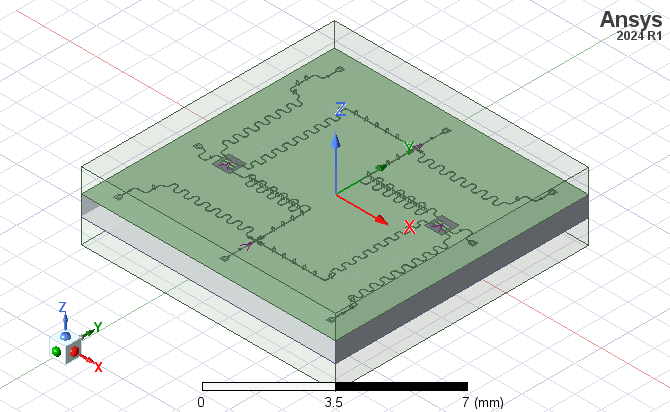

WindowsPath('C:/Users/user/Qiskit Metal/ansys.png')

In [47]:
eig_2qb.sim.save_screenshot()  # optional

In [48]:
eig_2qb.sim.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


## Rendering Block by Block

### Qubit 1, Qubit 3 and Bus_13

In [116]:
eig_qb = EPRanalysis(design, "hfss")

In [117]:
eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [118]:
# example: update single setting
eig_qb.sim.setup.n_modes = 3
eig_qb.sim.setup.max_passes = 12
eig_qb.sim.setup.vars = Dict(Lj1= '14.9 nH', Cj1= '0 fF',
                           Lj2= '13.3 nH', Cj2= '0 fF')
# example: update multiple settings
eig_qb.sim.setup_update(max_delta_f = 0.1, min_freq_ghz = 3)

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 3,
 'n_modes': 3,
 'max_delta_f': 0.1,
 'max_passes': 12,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '14.9 nH', 'Cj1': '0 fF', 'Lj2': '13.3 nH', 'Cj2': '0 fF'}}

In [119]:
# TODO: fold this inside either an analysis class method, or inside the analysis class setup

eig_qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_qb.sim.renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [120]:
eig_qb.sim.run(name="Block1", components=['Q_1','Q_3','Bus_13'], open_terminations=[('Q_1', 'readout'), ('Q_3', 'readout'), ('Q_1', 'Charge_Line')], box_plus_buffer = False)

INFO 04:08PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:08PM [load_ansys_project]: 	Opened Ansys App
INFO 04:08PM [load_ansys_project]: 	Opened Ansys Desktop v2024.1.0
INFO 04:08PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/user/Documents/Ansoft/
	Project:   Project5
INFO 04:08PM [connect_design]: No active design found (or error getting active design).
INFO 04:08PM [connect]: 	 Connected to project "Project5". No design detected
INFO 04:08PM [connect_design]: 	Opened active design
	Design:    Block1_hfss [Solution type: Eigenmode]
WARNING 04:08PM [connect_setup]: 	No design setup detected.
WARNING 04:08PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:08PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:09PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:09PM [analyze]: Analyzing setup Setup
04:17PM 08s INFO [get_f_convergence]: Saved convergences to C:\Users\user\Qis

In [121]:
eig_qb.sim.convergence_f

,re(Mode(1)) [g],re(Mode(2)) [g],re(Mode(3)) [g]
Pass [],,,
1,3.852027,4.544469,7.043666
2,4.383849,5.142001,7.909560
3,3.318168,4.908481,6.204092
4,3.978580,5.052250,7.079119
5,4.243533,5.183391,7.754772
6,4.525148,5.521671,8.260532
7,4.623836,5.656911,8.460240
8,4.719254,5.713348,8.552767
9,4.799615,5.741572,8.599301


In [122]:
eig_qb.sim.plot_fields('main', eigenmode=3)

INFO 04:24PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [123]:
eig_qb.sim.plot_convergences()

In [124]:
eig_qb.sim.clear_fields()

In [125]:
eig_qb.del_junction()
eig_qb.add_junction('jj1', 'Lj1', 'Cj1', rect='JJ_rect_Lj_Q_1_rect_jj', line='JJ_Lj_Q_1_rect_jj_')
eig_qb.add_junction('jj2', 'Lj2', 'Cj2', rect='JJ_rect_Lj_Q_3_rect_jj', line='JJ_Lj_Q_3_rect_jj_')
eig_qb.setup.sweep_variable = 'Lj1'
eig_qb.setup

{'junctions': {'jj1': {'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1',
   'rect': 'JJ_rect_Lj_Q_1_rect_jj',
   'line': 'JJ_Lj_Q_1_rect_jj_'},
  'jj2': {'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2',
   'rect': 'JJ_rect_Lj_Q_3_rect_jj',
   'line': 'JJ_Lj_Q_3_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

In [127]:
eig_qb.run_epr()

Design "Block1_hfss" info:
	# eigenmodes    3
	# variations    1
Design "Block1_hfss" info:
	# eigenmodes    3
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.33356965332102e-23
        energy_elec_substrate = 1.18890651580182e-23
        EPR of substrate = 89.2%

        energy_mag    = 1.33320130027317e-23
        energy_mag % of energy_elec_all  = 100.0%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.91 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.7%   1.57e-24 2.111e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.25%
	jj1              1.01455  (+)        0.0287263


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.53%
	jj2             5.80688e-08  (+)        1.46762e-09
		(U_tot_cap-U_tot_ind)/mean=0.04%
Calculating Qdielectric_main for mode 0 (0/2)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_0 = 0.9198122216633153

  Mode 1 at 5.77 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.9%  2.013e-24 1.996e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.24%
	jj1             0.00886815  (+)        0.000346771


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 96.63%
	jj2             4.1538e-06  (+)        1.44984e-07
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 1 (1/2)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_1 = 0.9156417043849421

  Mode 2 at 8.66 GHz   [3/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  6.668e-24 6.666e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 91.89%
	jj1             0.000302564  (+)        2.67029e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 92.70%
	jj2             7.59603e-08  (+)        5.98402e-09
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 2 (2/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.8915218735227352


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024382), None)

In [128]:
eig_qb.sim.close()

Warning! 6 COM references still alive
Ansys will likely refuse to shut down


## GDS

In [51]:
mt_gds = design.renderers.gds


In [58]:
mt_gds.options['path_filename'] = '../qiskit-metal-main/qiskit-metal-main/tutorials/resources/Fake_Junctions.GDS'

In [66]:


mt_gds.options.no_cheese.buffer = '40um'
mt_gds.options.max_points = 199
mt_gds.options.cheese.cheese_0_x = '2um'
mt_gds.options.cheese.cheese_0_y = '1um'
mt_gds.options.cheese.view_in_file = {'main': {1: True}}



In [67]:
mt_gds.export_to_gds("MyDesign1.gds")

1